# Visual Analyses

In this notebook I heavily use the multiplex visualization library to visualize the sentiment score generated by the VADER
analyzer.

A number of visualizations are generated.

For a detailed report please view, the report pdf.

# Setup

In [1]:
import json
import importlib
import matplotlib.pyplot as plt
import os
import sys
from multiplex import drawable
from tqdm.notebook import tqdm
from collections import defaultdict
import pandas as pd

Load the daily mean score tweets into Language.

In [2]:
jsontweets = json.load(open('Data/MeanSentiment.json'))
tweets = {jsontweets[id]['month']: jsontweets[id]['day'] for id in jsontweets}
Language = tweets

Using the os library, get set the ```date_range``` variable to the files in the Data/FilteredTwitterIDs/ directory.

In [3]:
_date_range = os.listdir('Data/FilteredTwitterIDs/')
dates = {'Dec':[], 'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[]}
for date in _date_range:
    if '0' in date:
        new_date = '01/'
    if '1' in date:
        new_date = '07/'
    if '2' in date:
        new_date = '14/'
    if '3' in date:
        new_date = '21/'
    if '4' in date:
        if 'May' in date:
             new_date = '26/'
        else:
             new_date = '28/'

    if 'December' in date:
        new_date += '12'
        dates['Dec'].append(new_date)
    if 'January' in date:
        new_date += '01'
        dates['Jan'].append(new_date)
    if 'February' in date:
        new_date += '02'
        dates['Feb'].append(new_date)
    if 'March' in date:
        new_date += '03'
        dates['Mar'].append(new_date)
    if 'April' in date:
        new_date += '04'
        dates['Apr'].append(new_date)
    if 'May' in date:
        new_date += '05'
        dates['May'].append(new_date)

date_range = []

for month in dates:
    for date in dates[month]:
        date_range.append(date)

Set up the multiplex library styles for the daily sentiment visualizations.

In [4]:
drawable = importlib.reload(drawable)
# reload the style modern-academic
plt.style.use(os.path.join(sys.path[0], 'styles', "multiplex.style"))

# create a general style
style = { 'linewidth': 2, 'label_style': { 'fontweight': 500 } }

en_style = { 'color': '#800020', 'label': 'English' }
es_style = { 'color': '#ffff00', 'label': 'Spanish' }
fr_style = { 'color': '#1560bd', 'label': 'French' }
de_style = { 'color': '#004b49', 'label': 'German' }
nl_style = { 'color': '#ff9933', 'label': 'Dutch' }
it_style = { 'color': '#00bfff', 'label': 'Italian' }

# Daily Mean Sentiment Plots

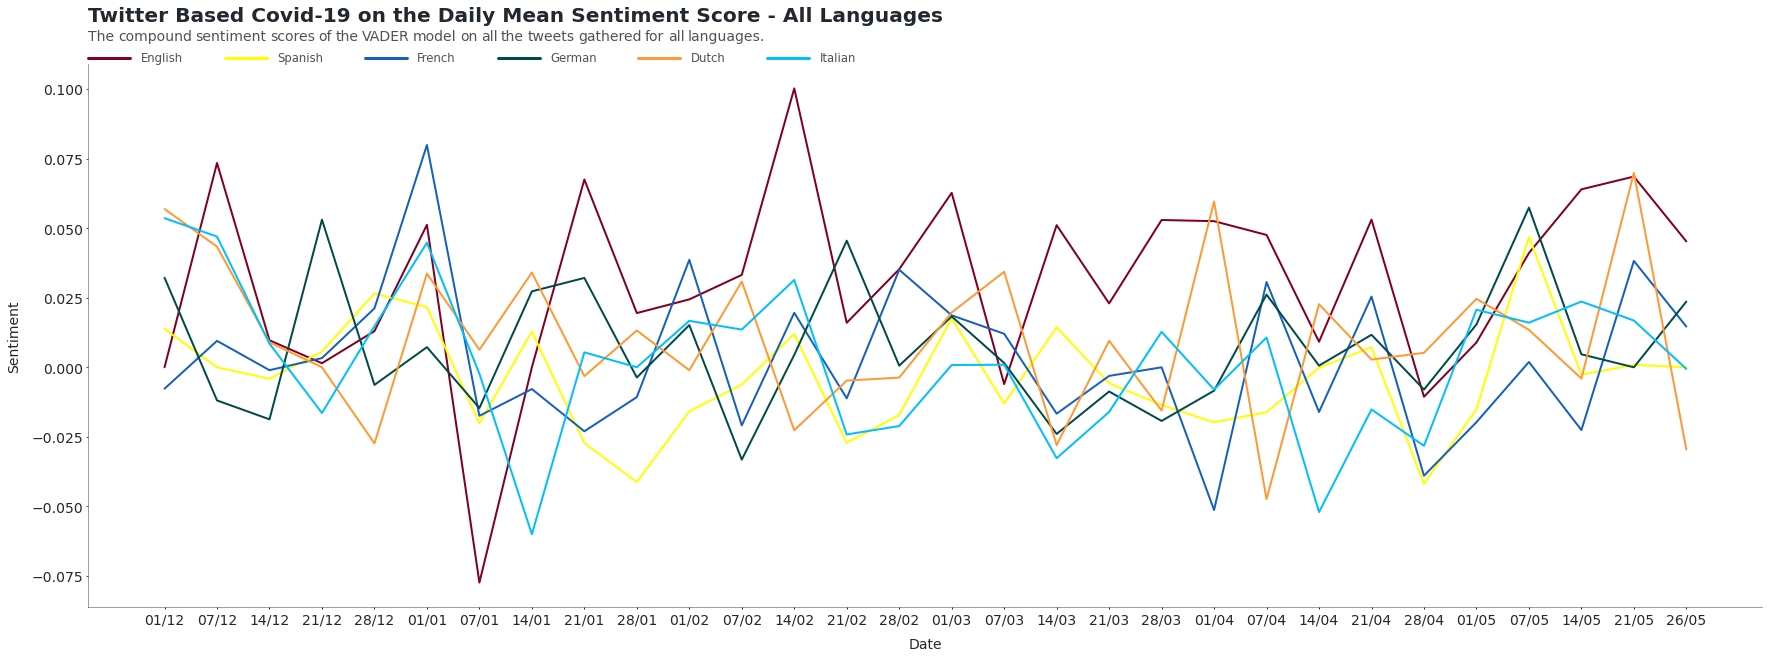

In [5]:
# draw the visualization
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), Language[1], **style, **en_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[2], **style, **es_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[3], **style, **fr_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[4], **style, **de_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[5], **style, **nl_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[6], **style, **it_style, with_legend=True)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Daily Mean Sentiment Score - All Languages', loc='left')
viz.set_caption("""
                The compound sentiment scores of the VADER model on all the tweets
                gathered for all languages.
                """, align='justify')
viz.savefig(fname='Output/Daily Mean All',dpi=300, bbox_inches='tight')
viz.show()

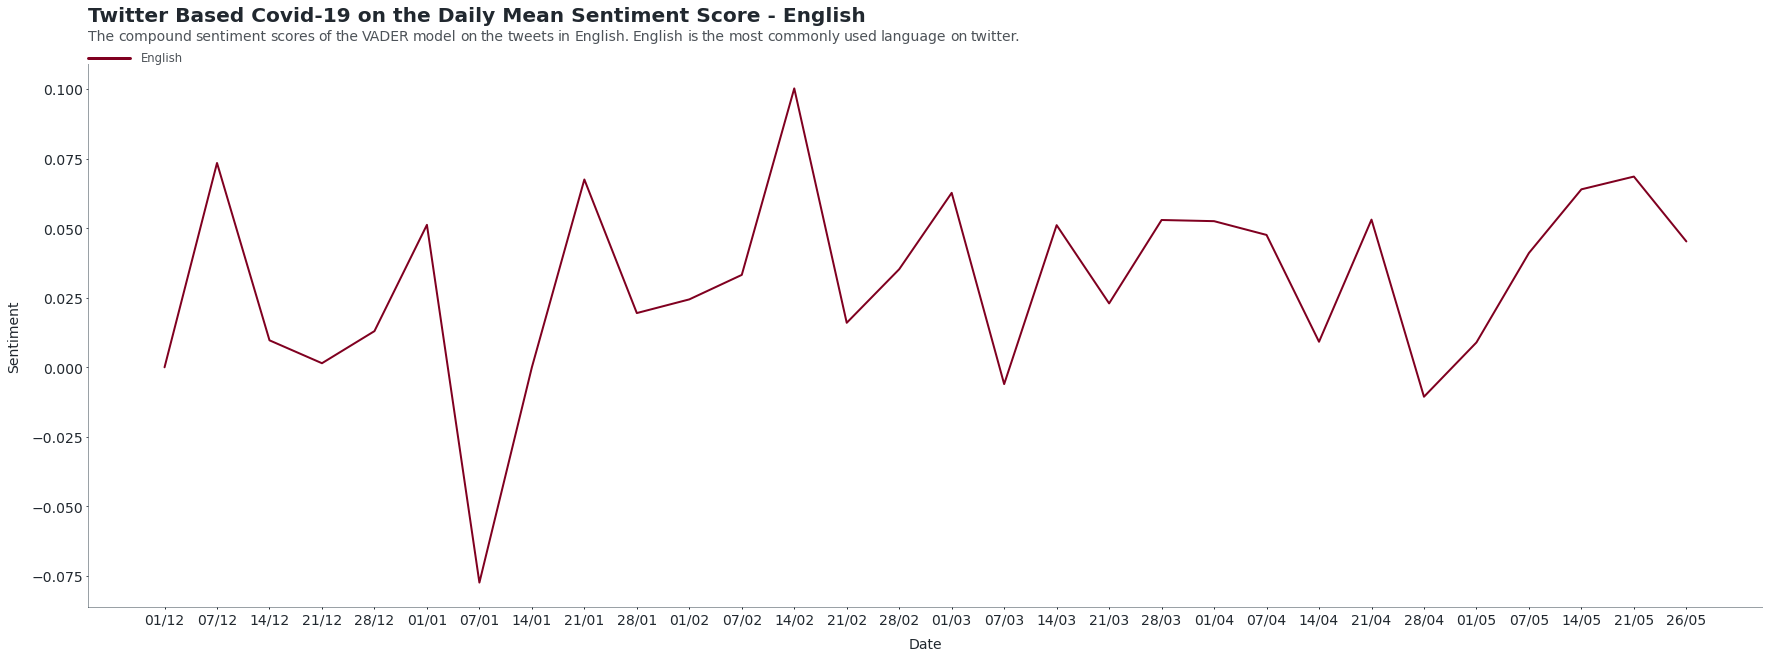

In [6]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), Language[1], **style, **en_style, with_legend=True)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Daily Mean Sentiment Score - English', loc='left')
viz.set_caption("""
                The compound sentiment scores of the VADER model on the tweets in English.
                English is the most commonly used language on twitter.
                """, align='justify')
viz.savefig(fname='Output/Daily Mean English',dpi=300, bbox_inches='tight')

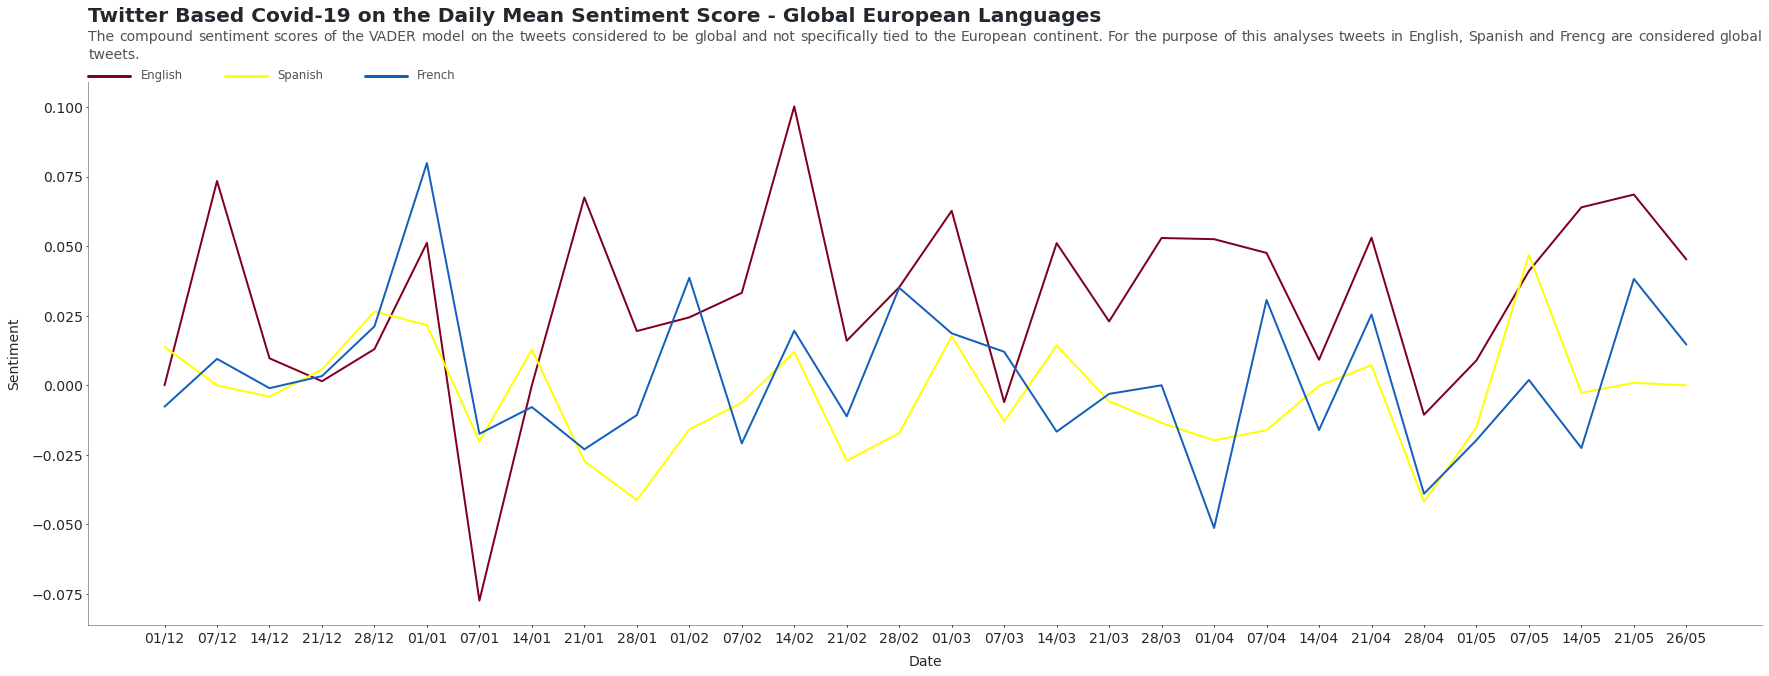

In [7]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), Language[1], **style, **en_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[2], **style, **es_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[3], **style, **fr_style, with_legend=True)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Daily Mean Sentiment Score - Global European Languages', loc='left')
viz.set_caption("""
                 The compound sentiment scores of the VADER model on the tweets considered to be global and not specifically tied to the European continent.
                 For the purpose of this analyses tweets in English, Spanish and Frencg are considered global tweets.
                 """, align='justify')
viz.savefig(fname='Output/Daily Mean Global',dpi=300, bbox_inches='tight')
viz.show()

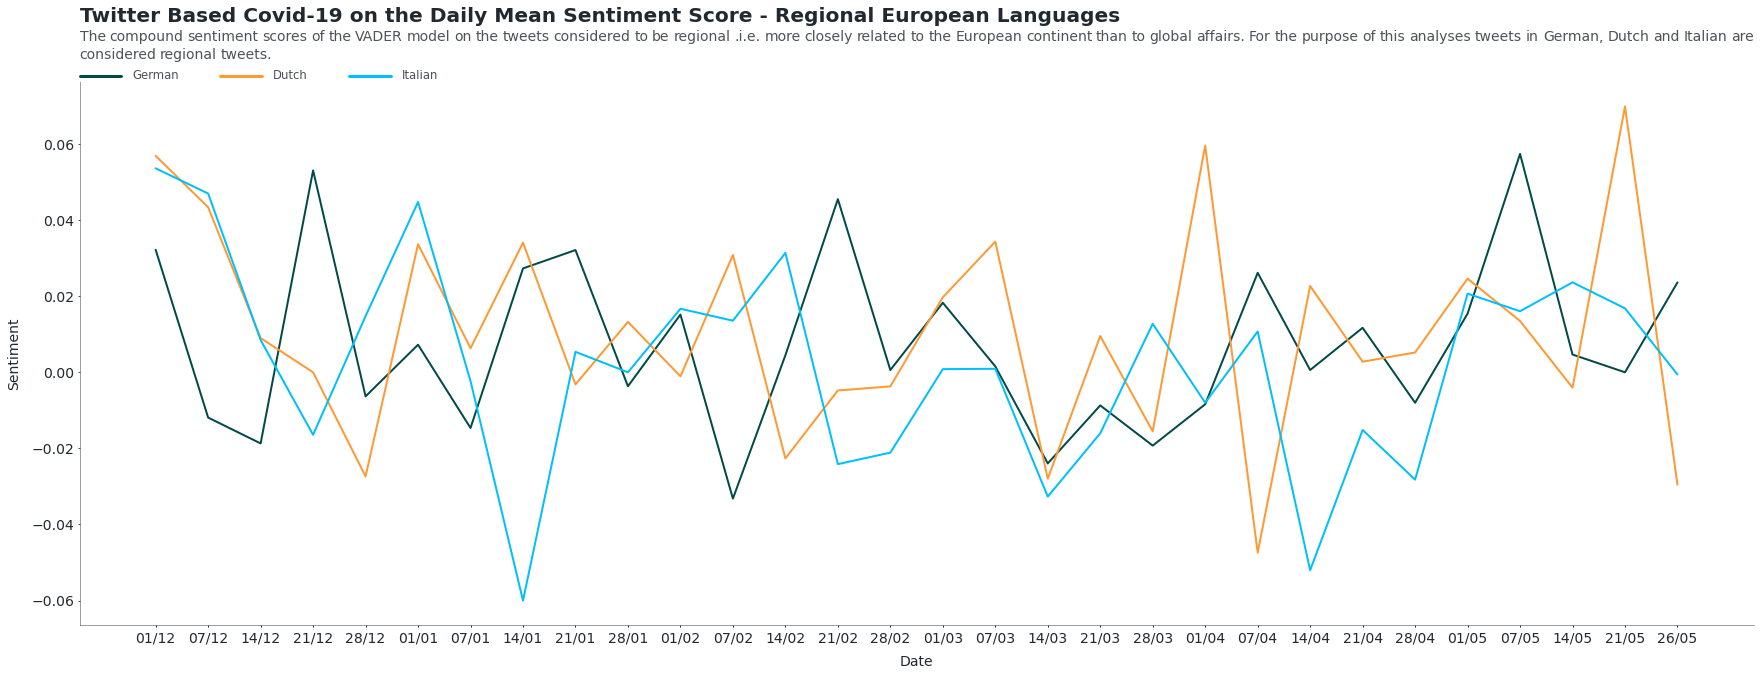

In [8]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), Language[4], **style, **de_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[5], **style, **nl_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[6], **style, **it_style, with_legend=True)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Daily Mean Sentiment Score - Regional European Languages', loc='left')
viz.set_caption("""
                 The compound sentiment scores of the VADER model on the tweets considered to be regional .i.e. more closely related to the European continent than to global affairs.
                 For the purpose of this analyses tweets in German, Dutch and Italian are considered regional tweets.
                 """, align='justify')
viz.savefig(fname='Output/Daily Mean Europe',dpi=300, bbox_inches='tight')
viz.show()

# Daily Sentiment Classification Plots

While easy to get, the daily mean sentiment does not provide enough information to identify trends. Instead the raw
compound scores will be loaded and classified into one of the following:

* very_positive
* positive
* neutral
* negative
* very_negative

A peak in the lines plotted for each classification should signify a public reaction to an event and it gravity.

In [9]:
LanguageDataFrames = defaultdict(lambda: [])

languages = {
                1: 'en',
                2: 'es',
                3: 'fr',
                4: 'de',
                5: 'nl',
                6: 'it',
            }

for month in tqdm(['December', 'January', 'February', 'March', 'April', 'May']):
    for day in [0, 1, 2, 3, 4]:
        for language in languages:
            path = 'Data/Analyzed Tweets/' + str(month) + str(day) + languages[language] + '.json'
            LanguageDataFrames[language].append(pd.read_json(path))

  0%|          | 0/6 [00:00<?, ?it/s]

Classify the scores.

In [10]:
distribution =  {
                    1: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    2: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    3: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    4: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    5: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    6: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]}
                }

for l in [1,2,3,4,5,6]:
    for df in tqdm(LanguageDataFrames[l]):
        # df = df.T
        day = {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]}
        for item in df['Score']:
            if item >= 0.75:
                day['very_positive'].append(item)
            elif 0.25 <= item < 0.75:
                day['positive'].append(item)
            elif -0.25 <= item < 0.25:
                day['neutral'].append(item)
            elif -0.75 <= item < 0.25:
                day['negative'].append(item)
            elif item < -0.75:
                day['very_negative'].append(item)

        for c in distribution[l]:
            distribution[l][c].append(day[c])

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Get the count of the classifications

In [11]:
counts =    {
                1: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                2: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                3: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                4: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                5: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                6: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]}
            }

for l in [1,2,3,4,5,6]:
    for d in distribution[l]:
        for item in distribution[l][d]:
            counts[l][d].append(len(item))

Here a function is written to facilitate the plots. New line styles are added.

In [12]:
vp_style = { 'color': '#00ff00', 'label': 'Very Positive' }
p_style = { 'color': '#4f7942', 'label': 'Positive' }
nn_style = { 'color': '#00bfff', 'label': 'Neutral' }
n_style = { 'color': '#801818', 'label': 'Negative' }
vn_style = { 'color': '#ff003f', 'label': 'Very Negative' }

def plotDistributionLines(count, title, caption, figname):
    figure = plt.figure(figsize=(30, 10))
    viz = drawable.Drawable(figure)
    viz.draw_time_series(range(0, 30), count['very_positive'], **style, **vp_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['positive'], **style, **p_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['neutral'], **style, **nn_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['negative'], **style, **n_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['very_negative'], **style, **vn_style, with_legend=True)

    plt.xticks(range(0, 30), date_range)
    # viz.set_xticks(range(0, 30))#, date_range
    viz.set_xlabel('Date')
    viz.set_ylabel('Count')
    viz.set_title(title, loc='left')
    viz.set_caption(caption, align='justify')
    viz.savefig(fname='Output/Score Classification '+figname, dpi=300, bbox_inches='tight')


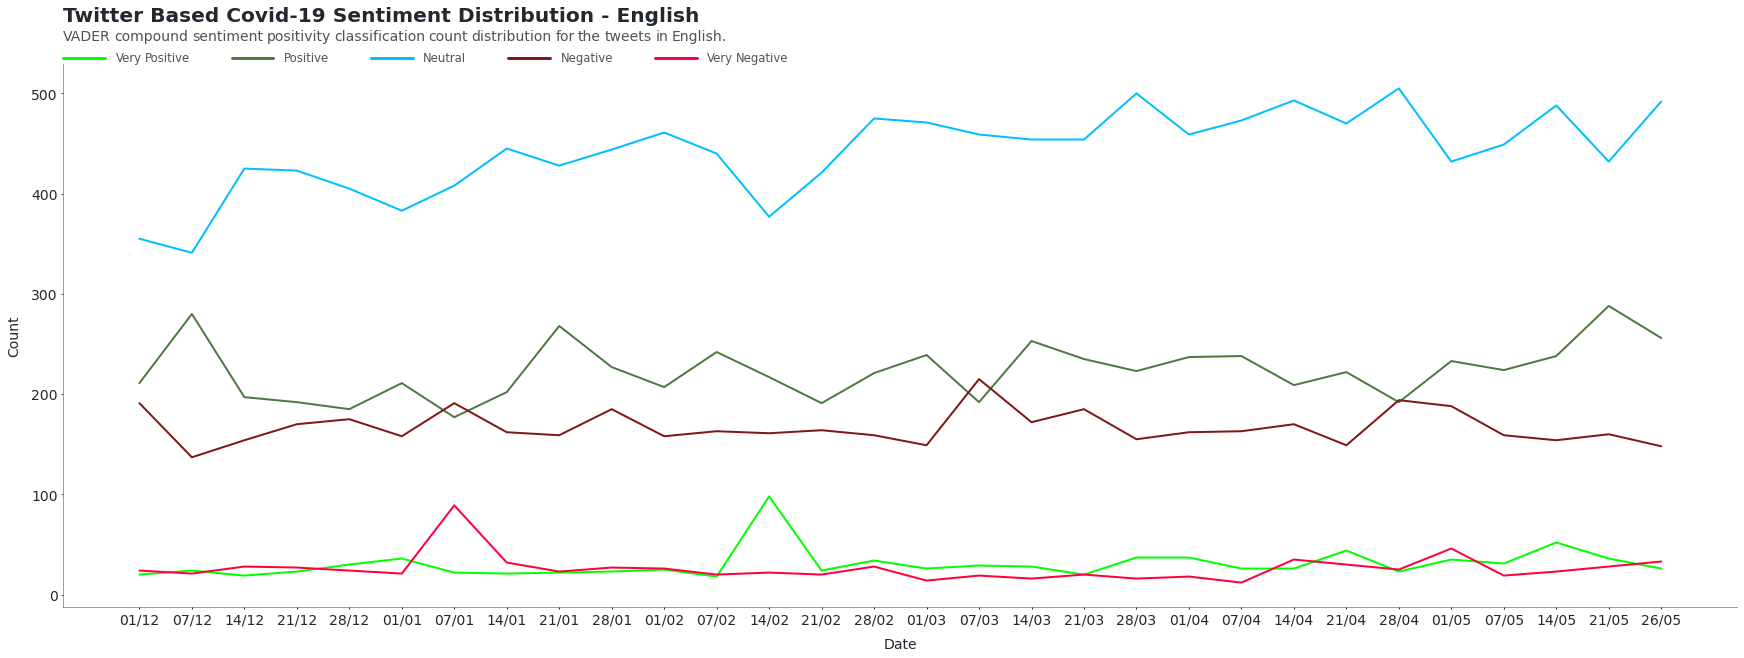

In [13]:
title = 'Twitter Based Covid-19 Sentiment Distribution - English'
caption = "VADER compound sentiment positivity classification count distribution for the tweets in English."
figname = 'English Distribution'

plotDistributionLines(counts[1], title, caption, figname)


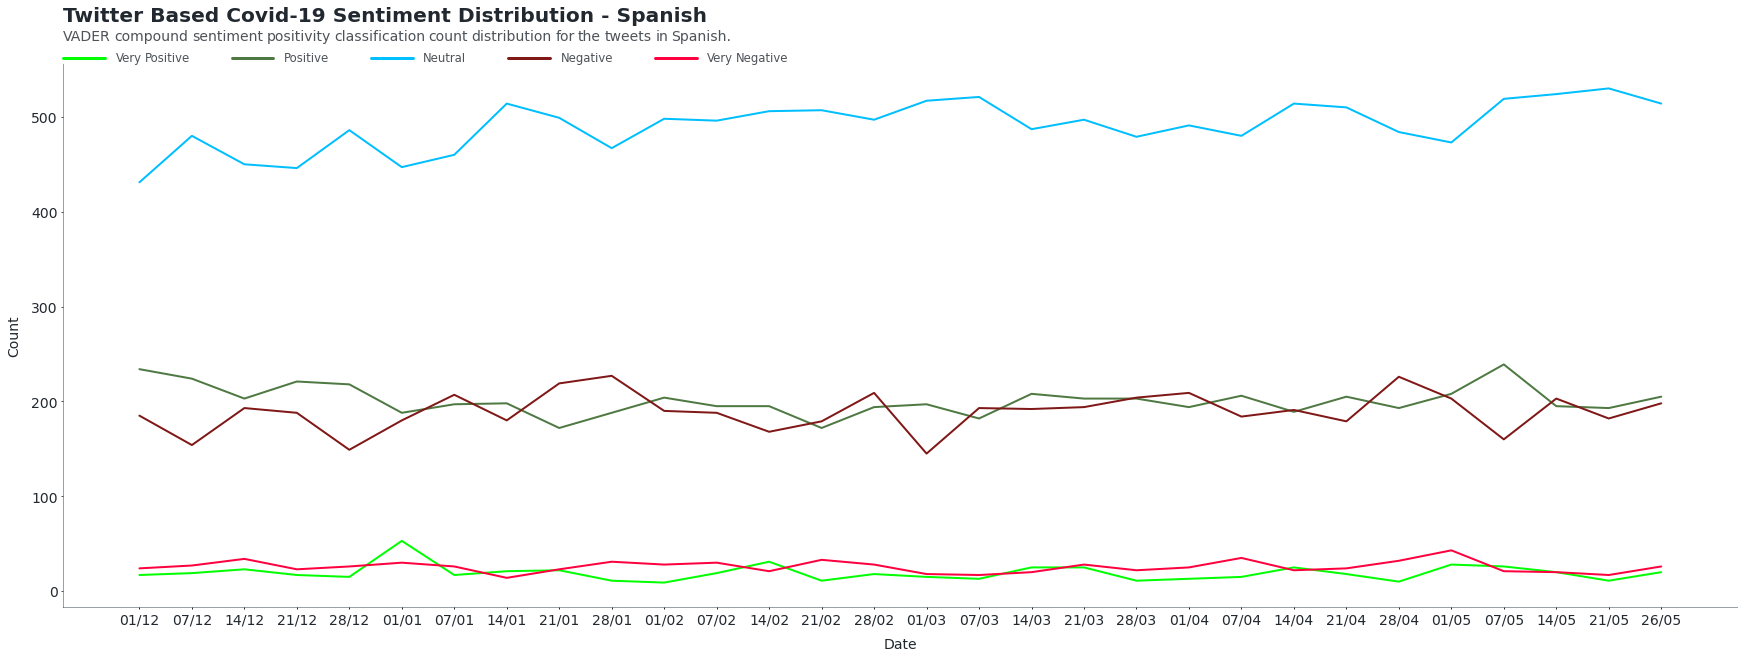

In [14]:
title = 'Twitter Based Covid-19 Sentiment Distribution - Spanish'
caption = "VADER compound sentiment positivity classification count distribution for the tweets in Spanish."
figname = 'Spanish Distribution'

plotDistributionLines(counts[2], title, caption, figname)

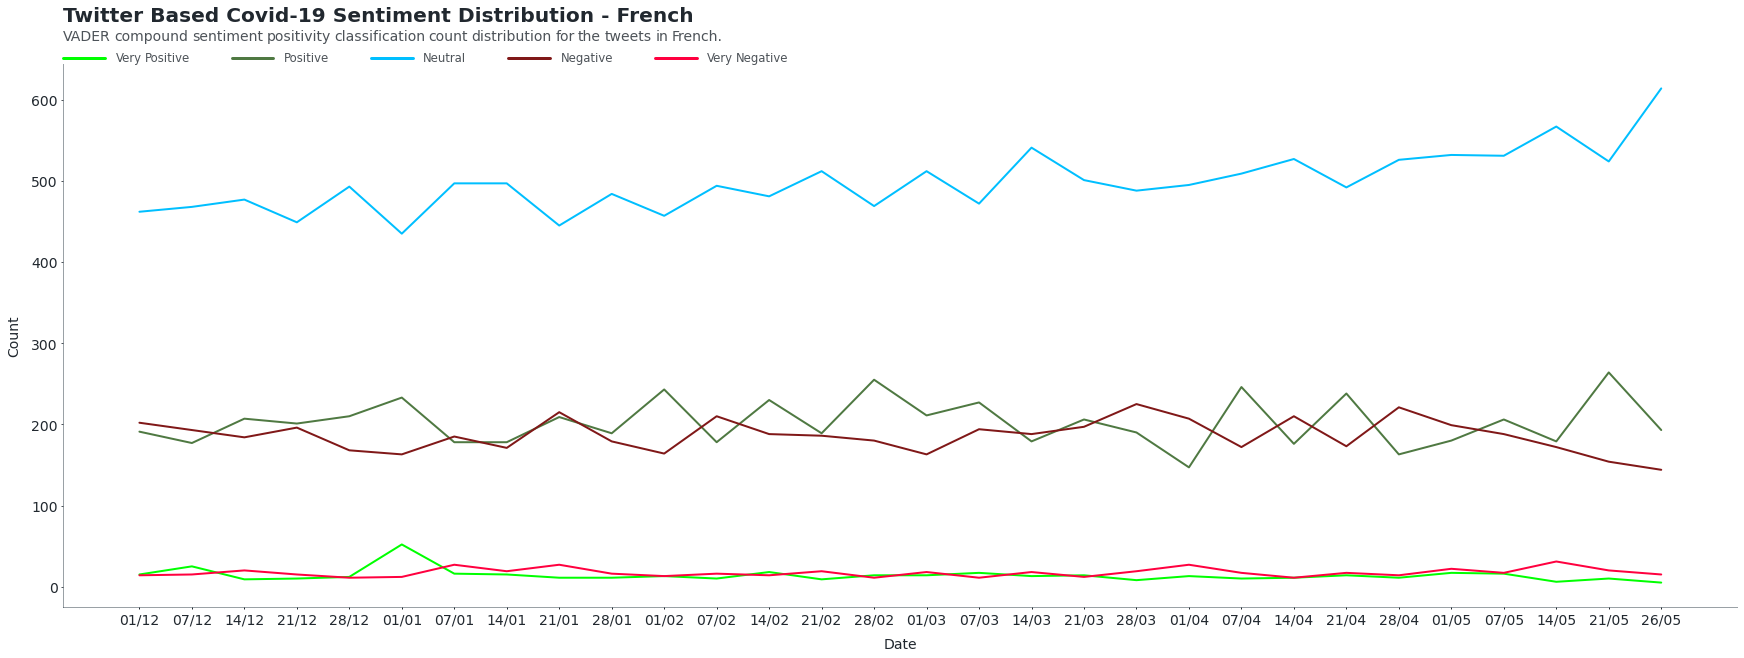

In [15]:

title = 'Twitter Based Covid-19 Sentiment Distribution - French'
caption = "VADER compound sentiment positivity classification count distribution for the tweets in French."
figname = 'French Distribution'

plotDistributionLines(counts[3], title, caption, figname)

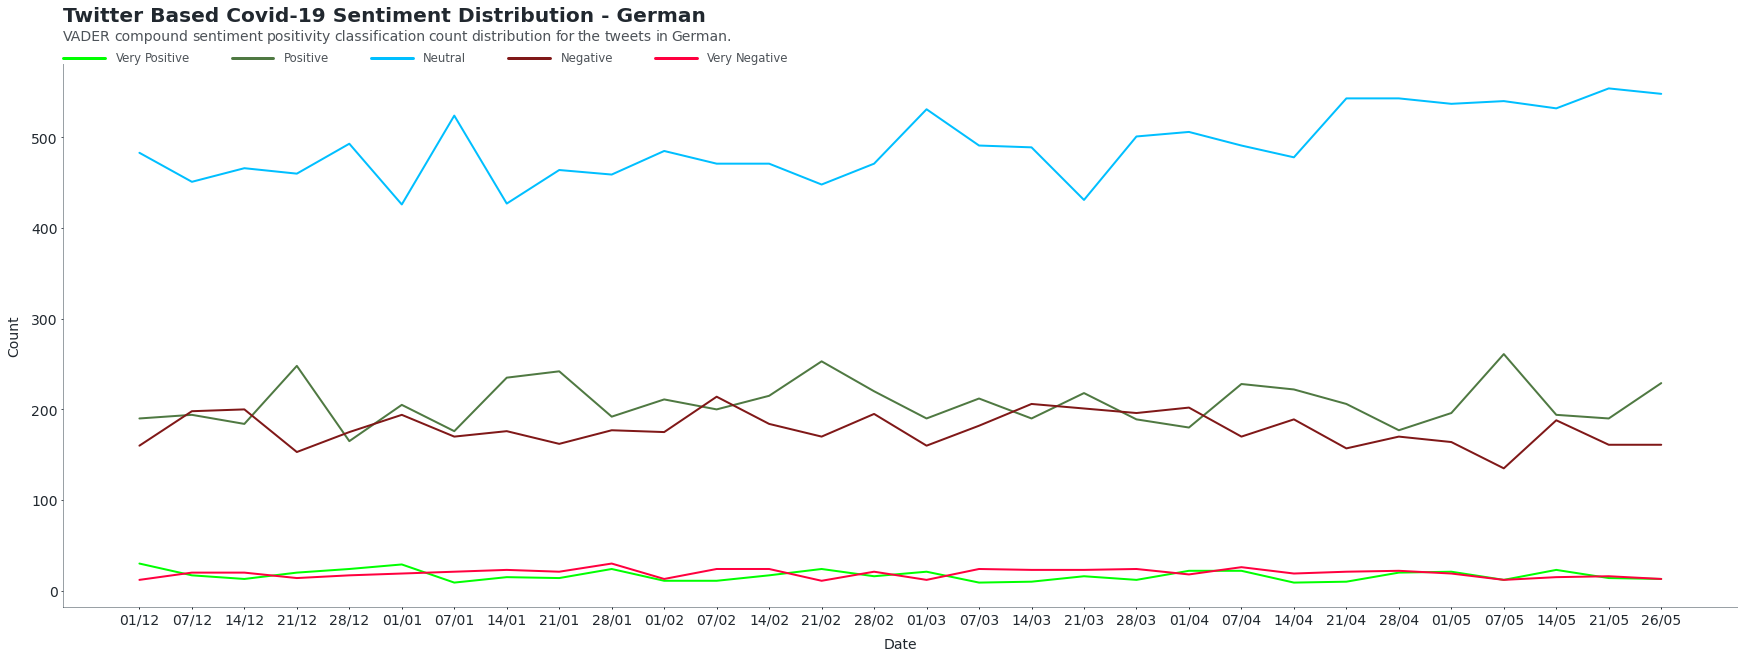

In [16]:

title = 'Twitter Based Covid-19 Sentiment Distribution - German'
caption = "VADER compound sentiment positivity classification count distribution for the tweets in German."
figname = 'German Distribution'

plotDistributionLines(counts[4], title, caption, figname)


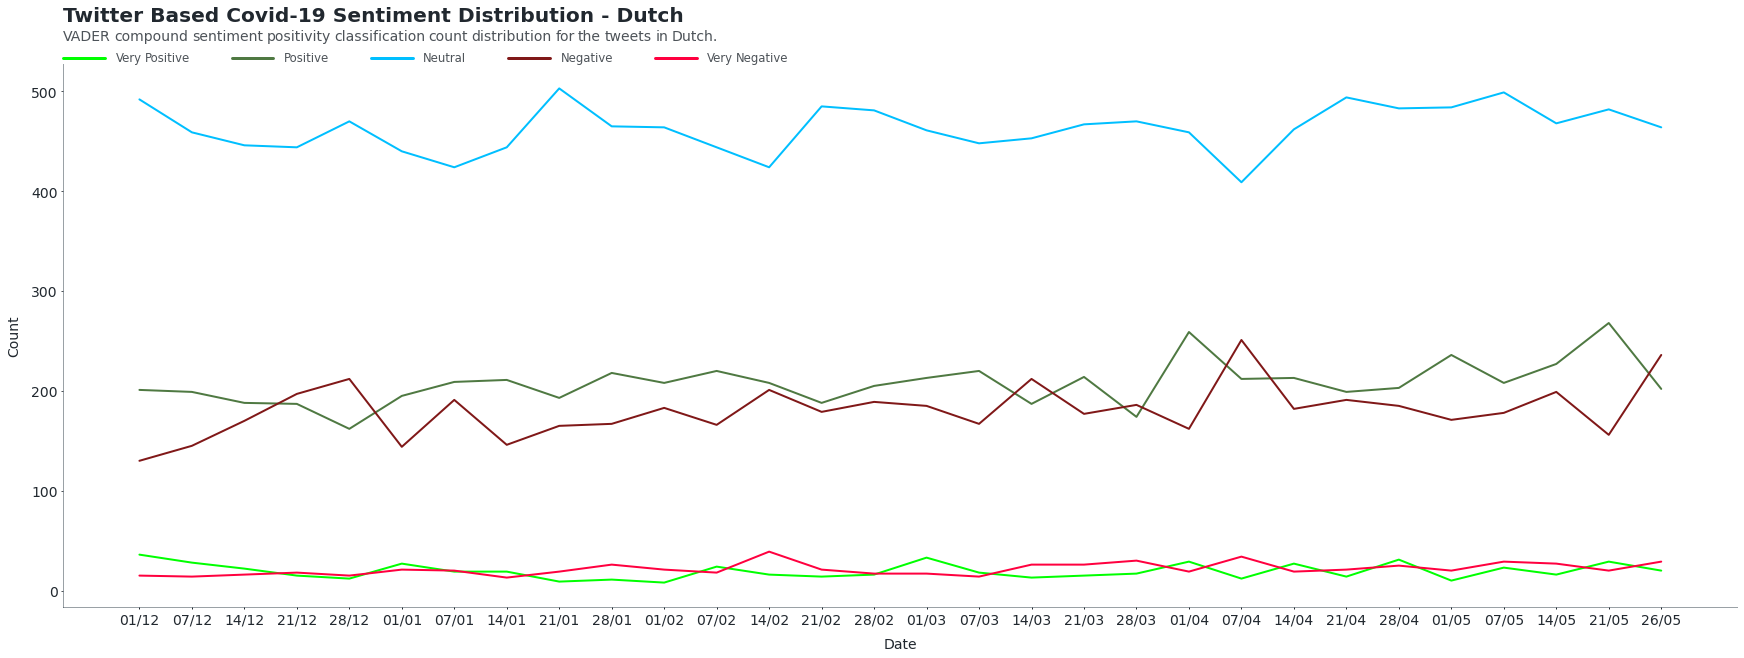

In [17]:

title = 'Twitter Based Covid-19 Sentiment Distribution - Dutch'
caption = "VADER compound sentiment positivity classification count distribution for the tweets in Dutch."
figname = 'Dutch Distribution'

plotDistributionLines(counts[5], title, caption, figname)


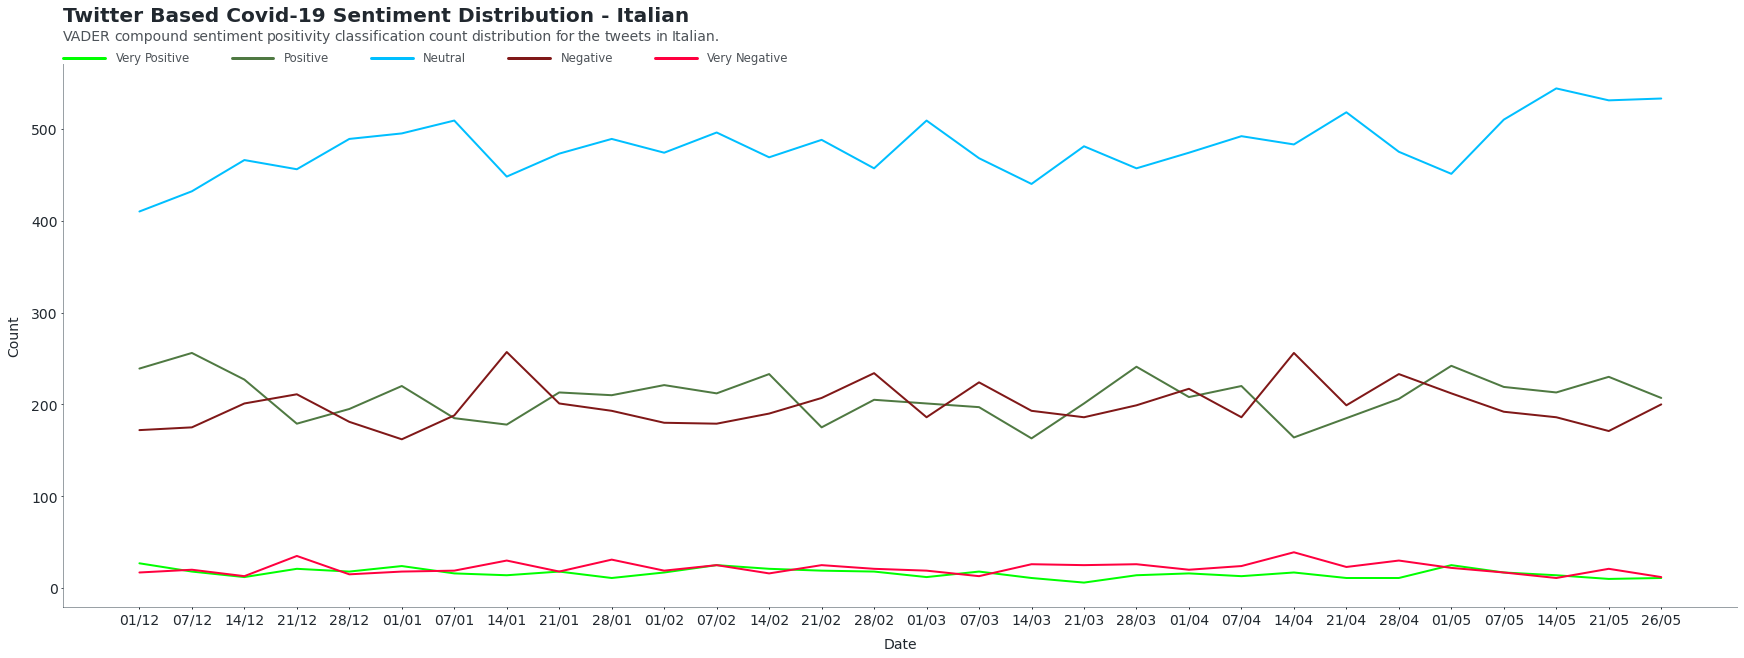

In [18]:

title = 'Twitter Based Covid-19 Sentiment Distribution - Italian'
caption = "VADER compound sentiment positivity classification count distribution for the tweets in Italian."
figname = 'Italian Distribution'

plotDistributionLines(counts[6], title, caption, figname)

# Daily Article Mean sentiment

In [19]:
CountryArticles = defaultdict(lambda: [])
ArticleMean = defaultdict(lambda: [])

root = 'Data/Analyzed Articles/'
if not os.access(root, os.R_OK):
    print("Check root!!")


for language in tqdm(os.listdir(root)):
    file_path = os.path.join(root, language)
    CountryArticles[language[14:-5]] = pd.read_json(file_path)

  0%|          | 0/6 [00:00<?, ?it/s]

In [20]:
jsonarticles = json.load(open('Data/ArticleMeanSentiment.json'))
article_mean = {jsonarticles[id]['country']: jsonarticles[id]['day'] for id in jsonarticles}

In [21]:
tw_style = { 'color': '#00bfff', 'label': 'Tweet' }
ar_style = { 'color': '#bd33a4', 'label': 'Article' }
def plotMeanArticleVSTwitter(articles, tweets, title, caption, figname):
    figure = plt.figure(figsize=(30, 10))
    viz = drawable.Drawable(figure)
    viz.draw_time_series(range(0, 30), articles, **style, **ar_style, with_legend=True)
    viz.draw_time_series(range(0, 30), tweets, **style, **tw_style, with_legend=True)

    plt.xticks(range(0, 30), date_range)
    viz.set_xlabel('Date')
    viz.set_ylabel('Sentiment')

    viz.set_title(title, loc='left')
    viz.set_caption(caption, align='justify')
    viz.savefig(fname='Output/'+figname, dpi=300, bbox_inches='tight')

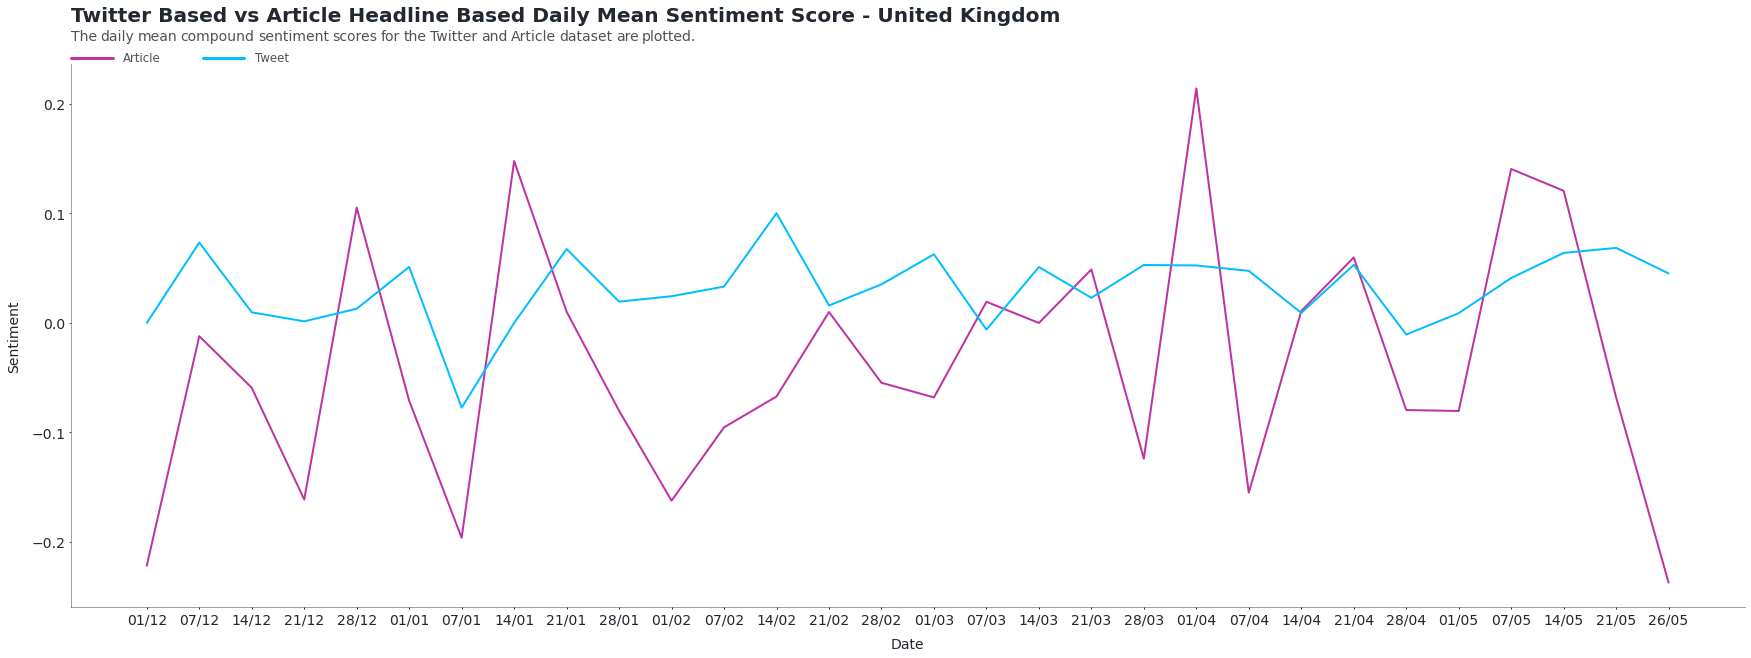

In [22]:
title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - United Kingdom'
caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted."
figname = 'Daily Mean Article VS Twitter UK'

plotMeanArticleVSTwitter(article_mean['UK'], Language[1], title, caption, figname)

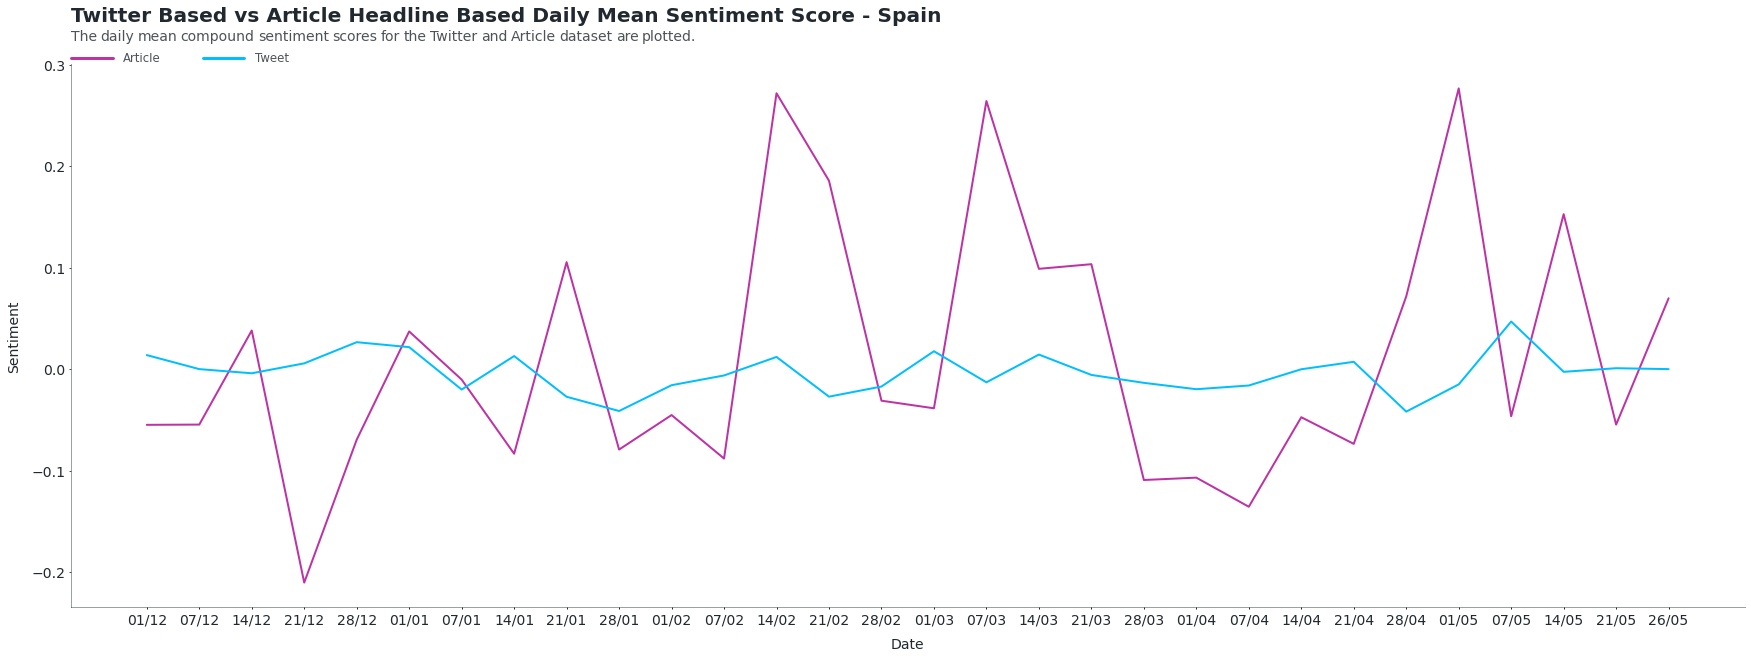

In [23]:
title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - Spain'
caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted."
figname = 'Daily Mean Article VS Twitter Spain'

plotMeanArticleVSTwitter(article_mean['Spain'], Language[2], title, caption, figname)

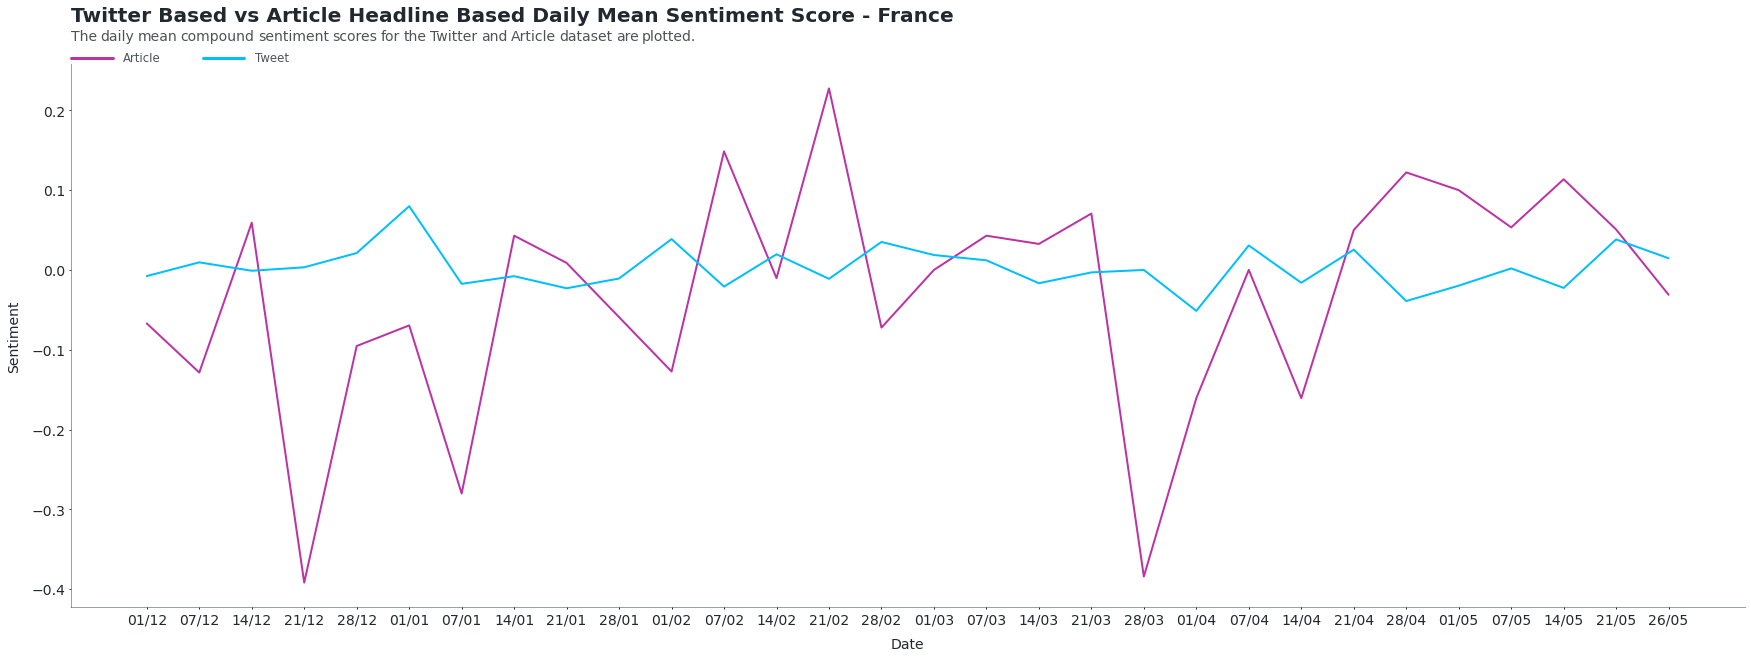

In [24]:
title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - France'
caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted."
figname = 'Daily Mean Article VS Twitter France'

plotMeanArticleVSTwitter(article_mean['France'], Language[3], title, caption, figname)

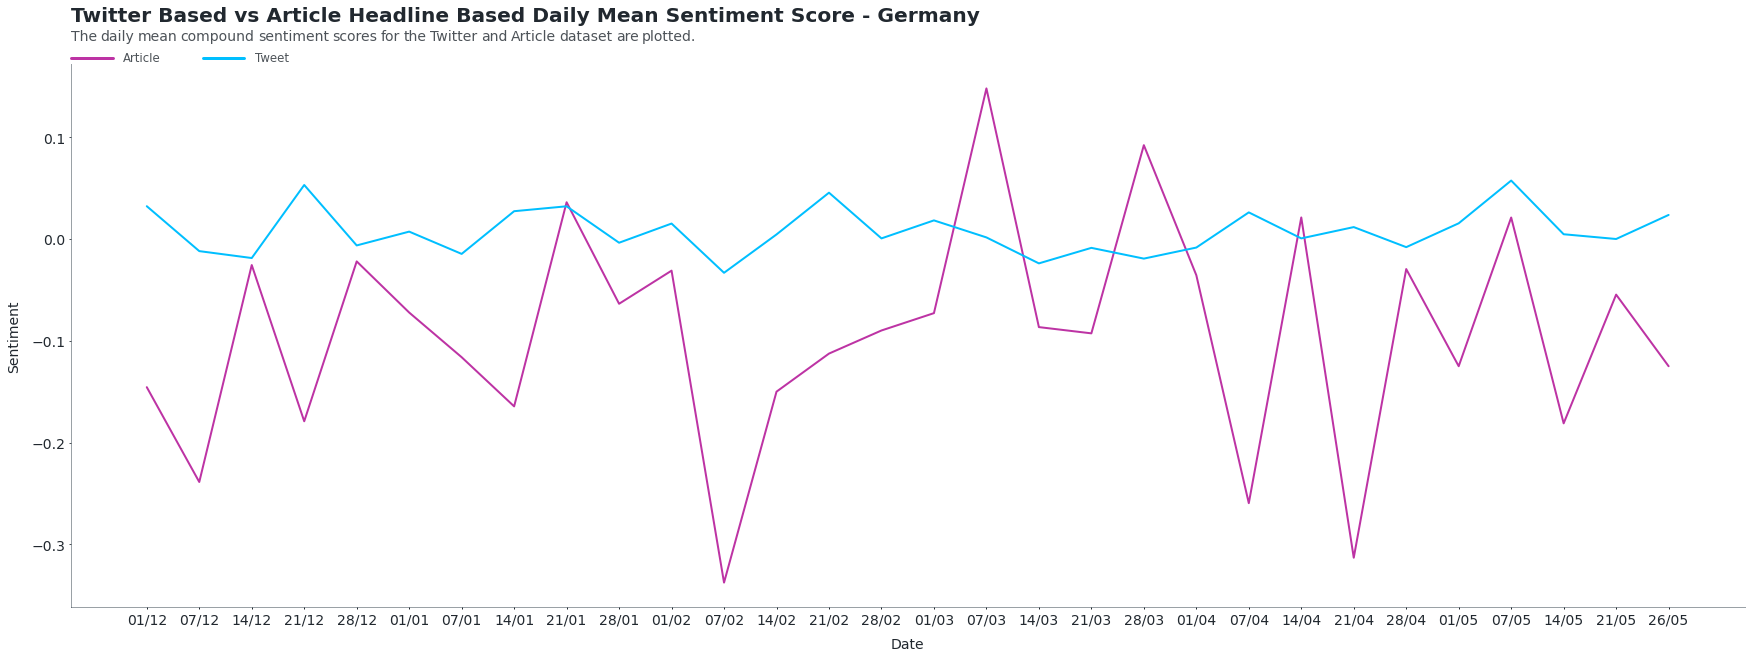

In [25]:
title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - Germany'
caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted."
figname = 'Daily Mean Article VS Twitter Germany'

plotMeanArticleVSTwitter(article_mean['Germany'], Language[4], title, caption, figname)

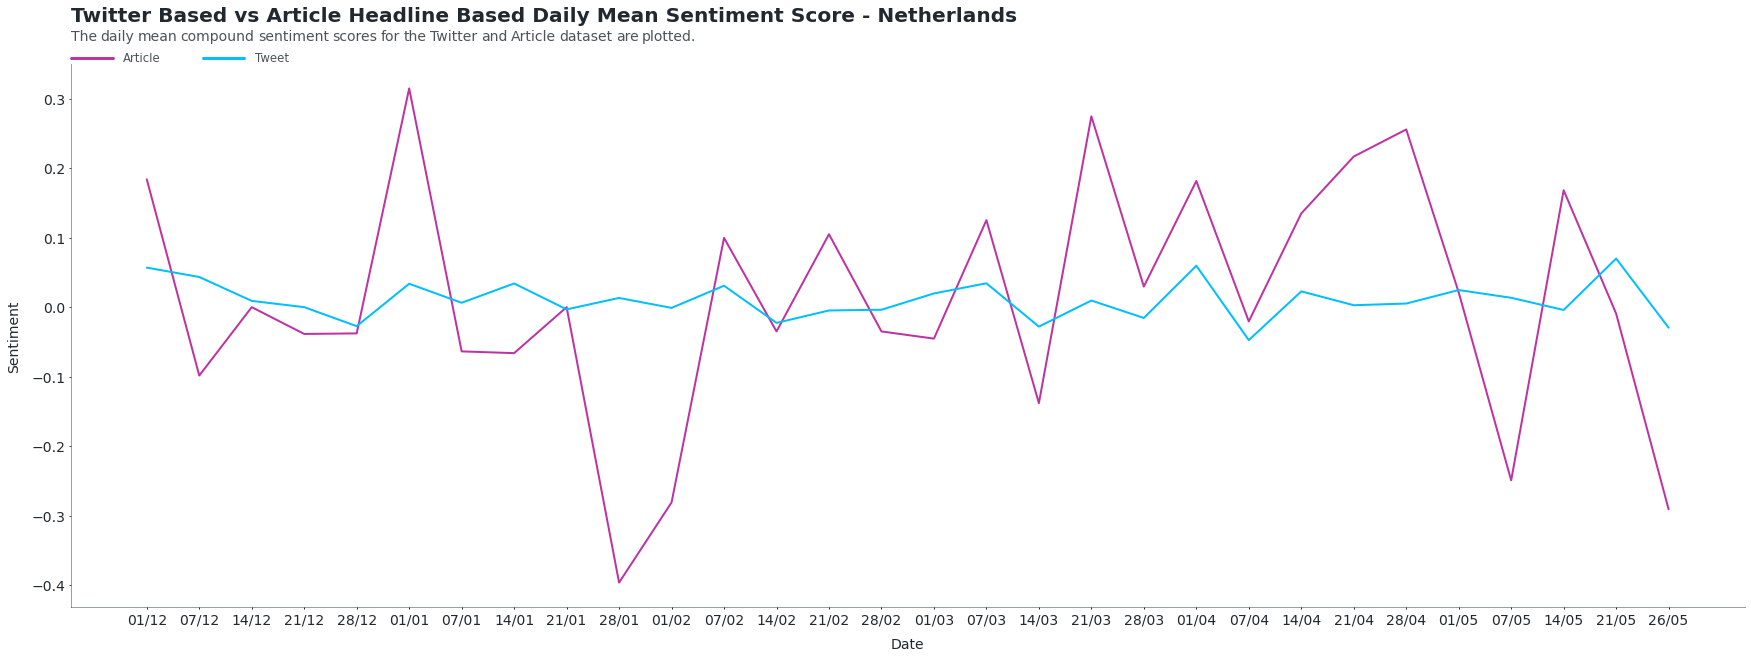

In [26]:
title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - Netherlands'
caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted."
figname = 'Daily Mean Article VS Twitter Netherlands'

plotMeanArticleVSTwitter(article_mean['Netherlands'], Language[5], title, caption, figname)

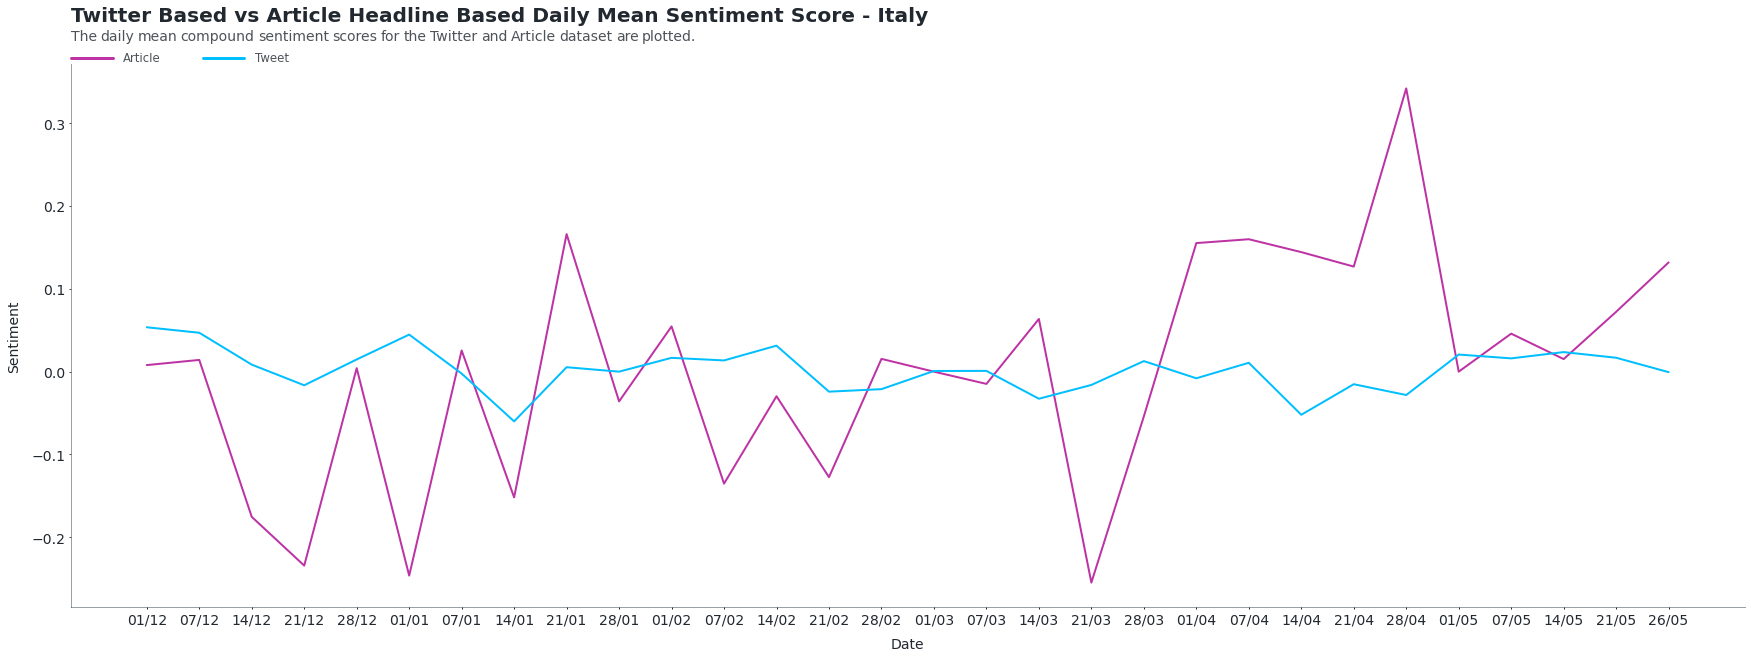

In [27]:
title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - Italy'
caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted."
figname = 'Daily Mean Article VS Twitter Italy'

plotMeanArticleVSTwitter(article_mean['Italy'], Language[6], title, caption, figname)

# Daily Sentiment Classification Plots with Article Mean Sentiment

In [28]:
def plotDistributionLinesWithMean(count, title, caption, mean, figname):
    figure = plt.figure(figsize=(30, 10))
    viz = drawable.Drawable(figure)
    viz.draw_time_series(range(0, 30), [((m*100)+300) for m in mean], **style, **ar_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['very_positive'], **style, **vp_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['positive'], **style, **p_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['neutral'], **style, **nn_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['negative'], **style, **n_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['very_negative'], **style, **vn_style, with_legend=True)

    plt.xticks(range(0, 30), date_range)
    # viz.set_xticks(range(0, 30))#, date_range
    viz.set_xlabel('Date')
    viz.set_ylabel('Count')
    viz.set_title(title, loc='left')
    viz.set_caption(caption, align='justify')
    viz.savefig(fname='Output/Article Mean and Score Classification '+figname, dpi=300, bbox_inches='tight')

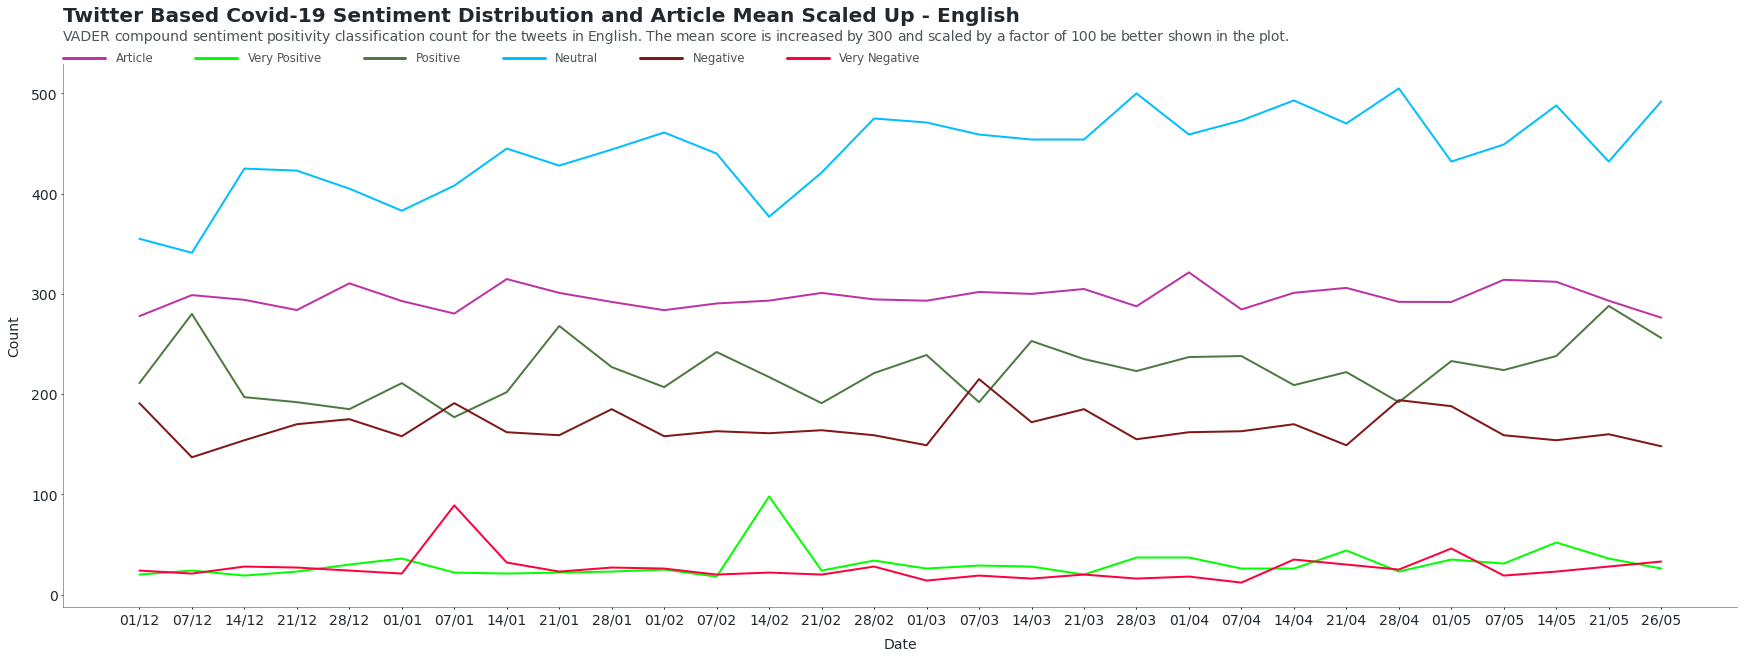

In [29]:
title = 'Twitter Based Covid-19 Sentiment Distribution and Article Mean Scaled Up - English'
caption =   """
            VADER compound sentiment positivity classification count for the tweets in English.
            The mean score is increased by 300 and scaled by a factor of 100 be better shown in the plot.
            """
figname = 'English Distribution'

plotDistributionLinesWithMean(counts[1], title, caption, article_mean['UK'], figname)


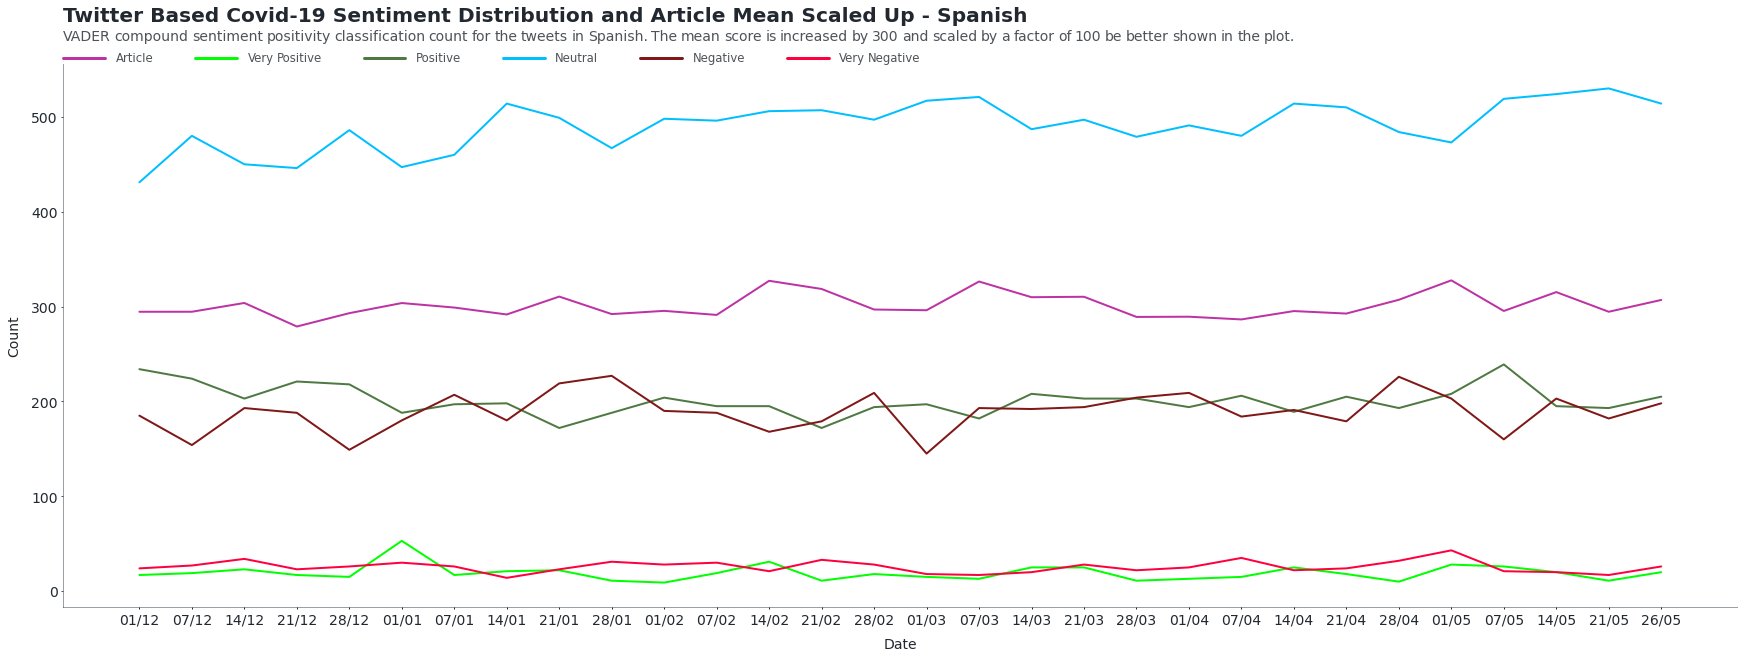

In [30]:
title = 'Twitter Based Covid-19 Sentiment Distribution and Article Mean Scaled Up - Spanish'
caption =   """
            VADER compound sentiment positivity classification count for the tweets in Spanish.
            The mean score is increased by 300 and scaled by a factor of 100 be better shown in the plot.
            """
figname = 'Spanish Distribution'

plotDistributionLinesWithMean(counts[2], title, caption, article_mean['Spain'], figname)

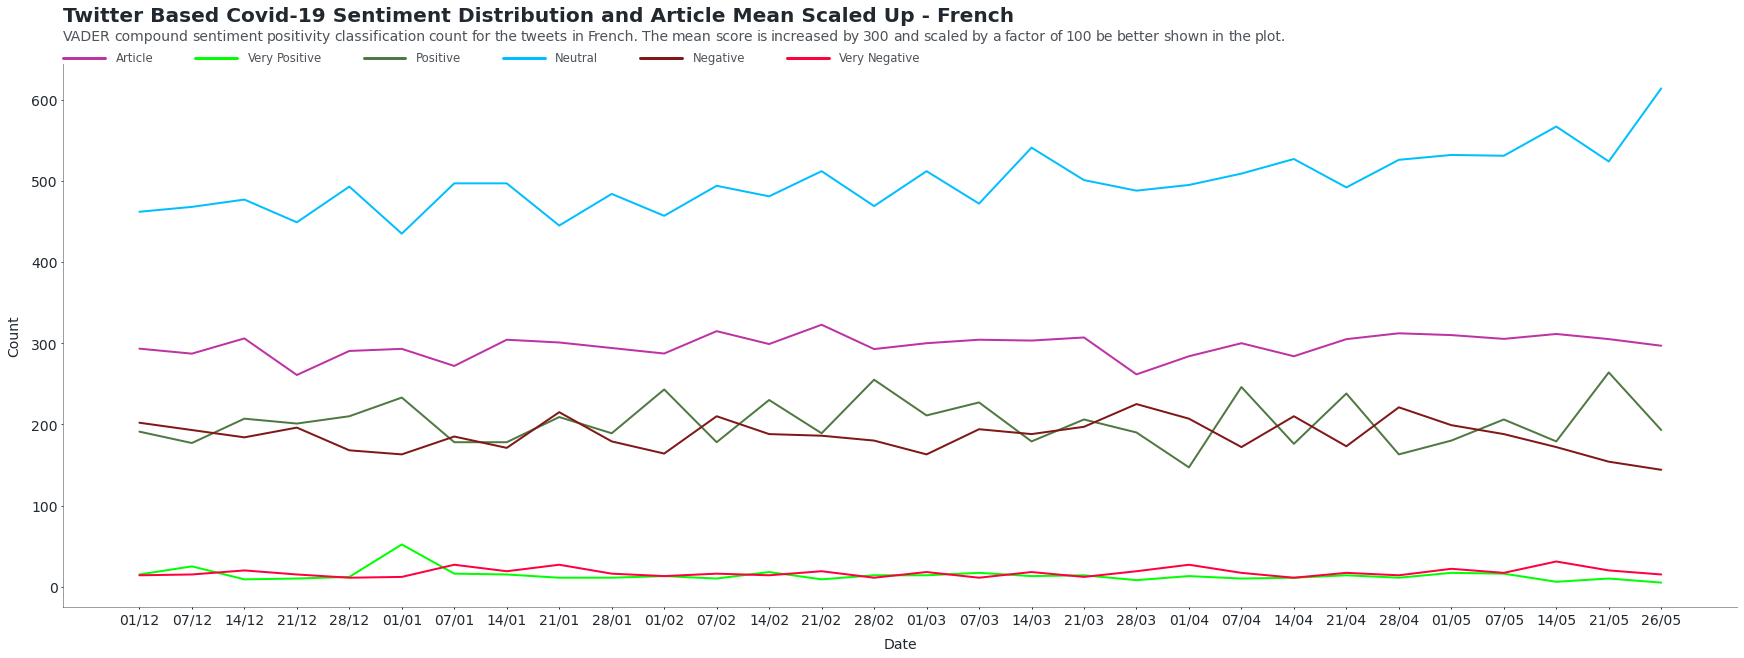

In [31]:

title = 'Twitter Based Covid-19 Sentiment Distribution and Article Mean Scaled Up - French'
caption =   """
            VADER compound sentiment positivity classification count for the tweets in French.
            The mean score is increased by 300 and scaled by a factor of 100 be better shown in the plot.
            """
figname = 'French Distribution'

plotDistributionLinesWithMean(counts[3], title, caption, article_mean['France'], figname)

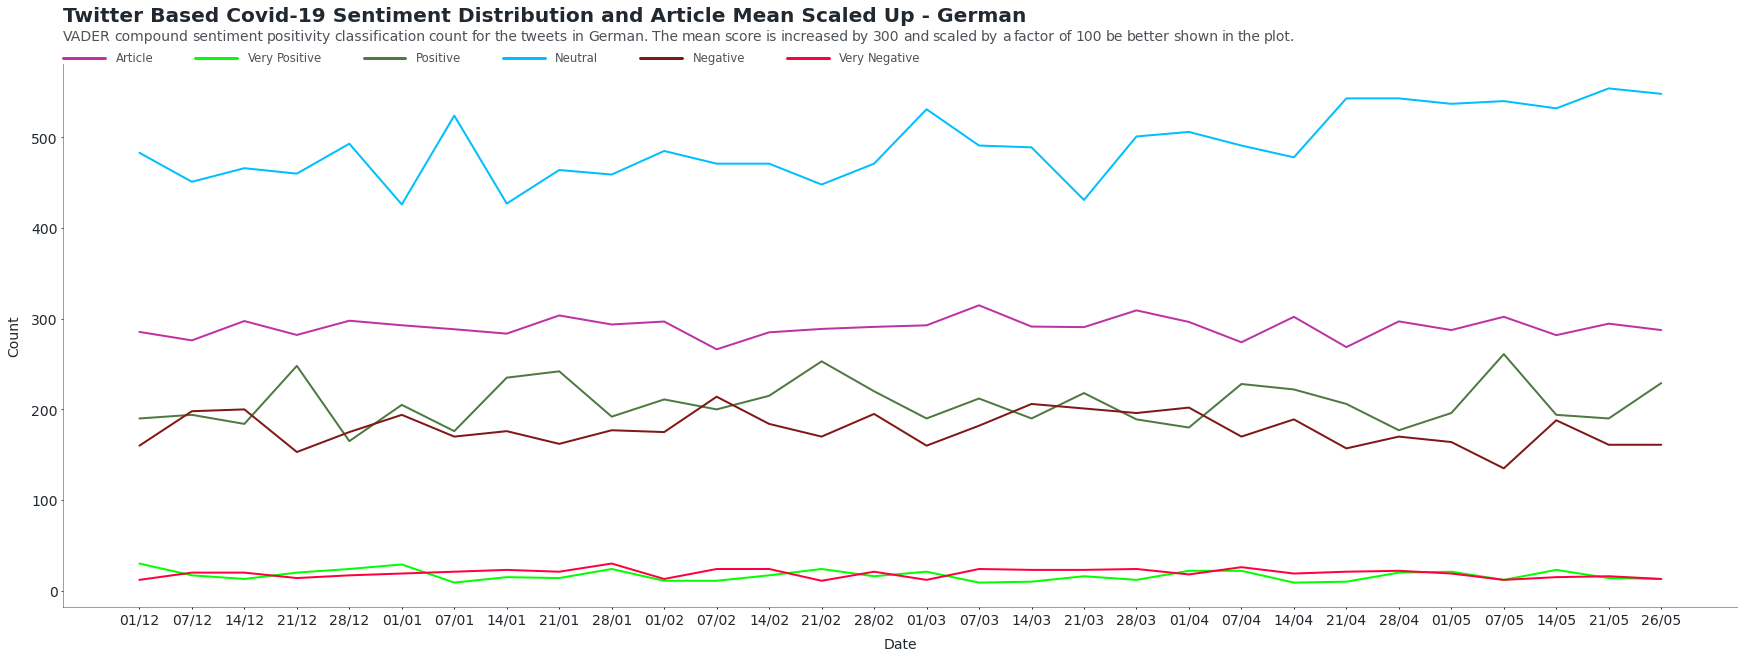

In [32]:

title = 'Twitter Based Covid-19 Sentiment Distribution and Article Mean Scaled Up - German'
caption =   """
            VADER compound sentiment positivity classification count for the tweets in German.
            The mean score is increased by 300 and scaled by a factor of 100 be better shown in the plot.
            """
figname = 'German Distribution'

plotDistributionLinesWithMean(counts[4], title, caption, article_mean['Germany'], figname)

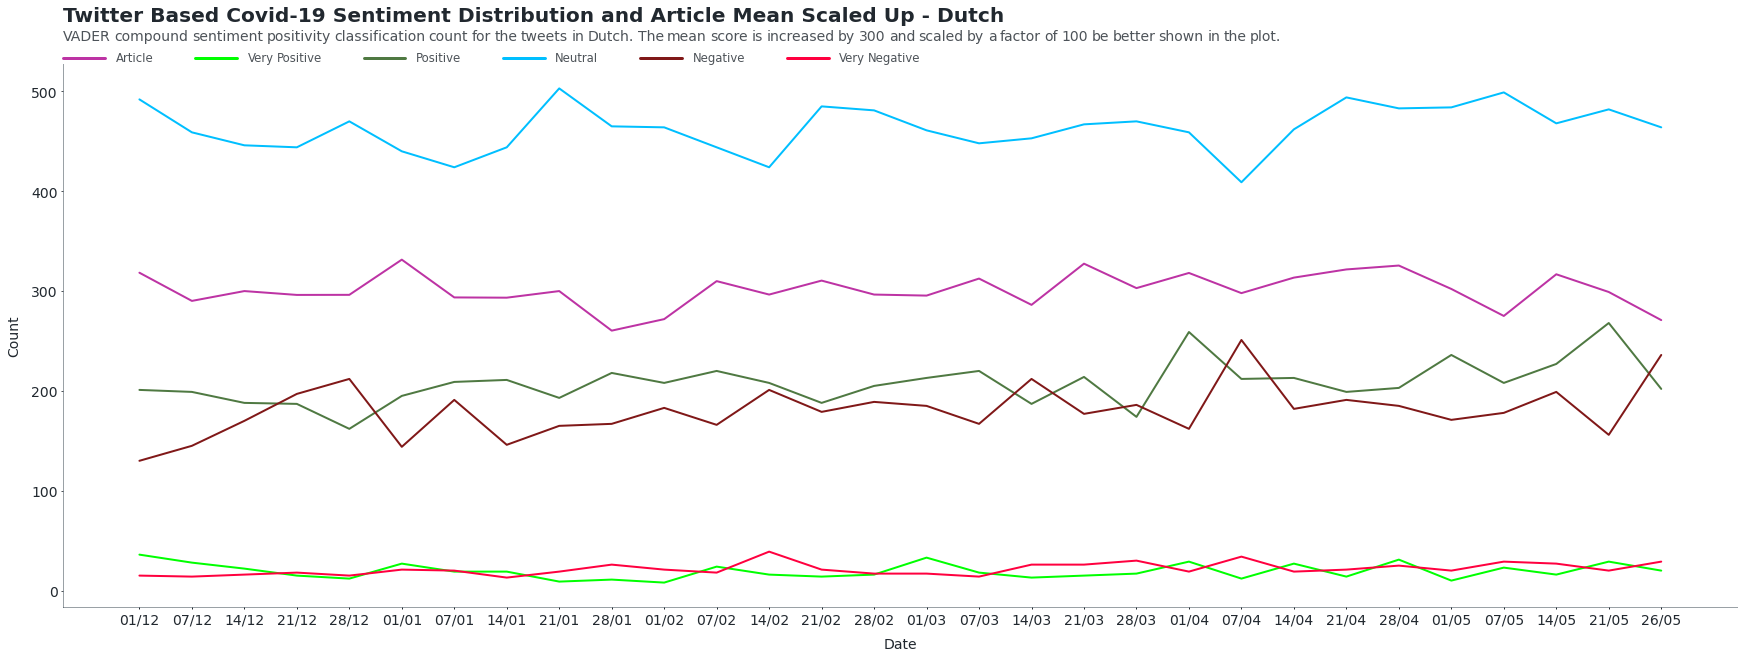

In [33]:

title = 'Twitter Based Covid-19 Sentiment Distribution and Article Mean Scaled Up - Dutch'
caption =   """
            VADER compound sentiment positivity classification count for the tweets in Dutch.
            The mean score is increased by 300 and scaled by a factor of 100 be better shown in the plot.
            """
figname = 'Dutch Distribution'

plotDistributionLinesWithMean(counts[5], title, caption, article_mean['Netherlands'], figname)

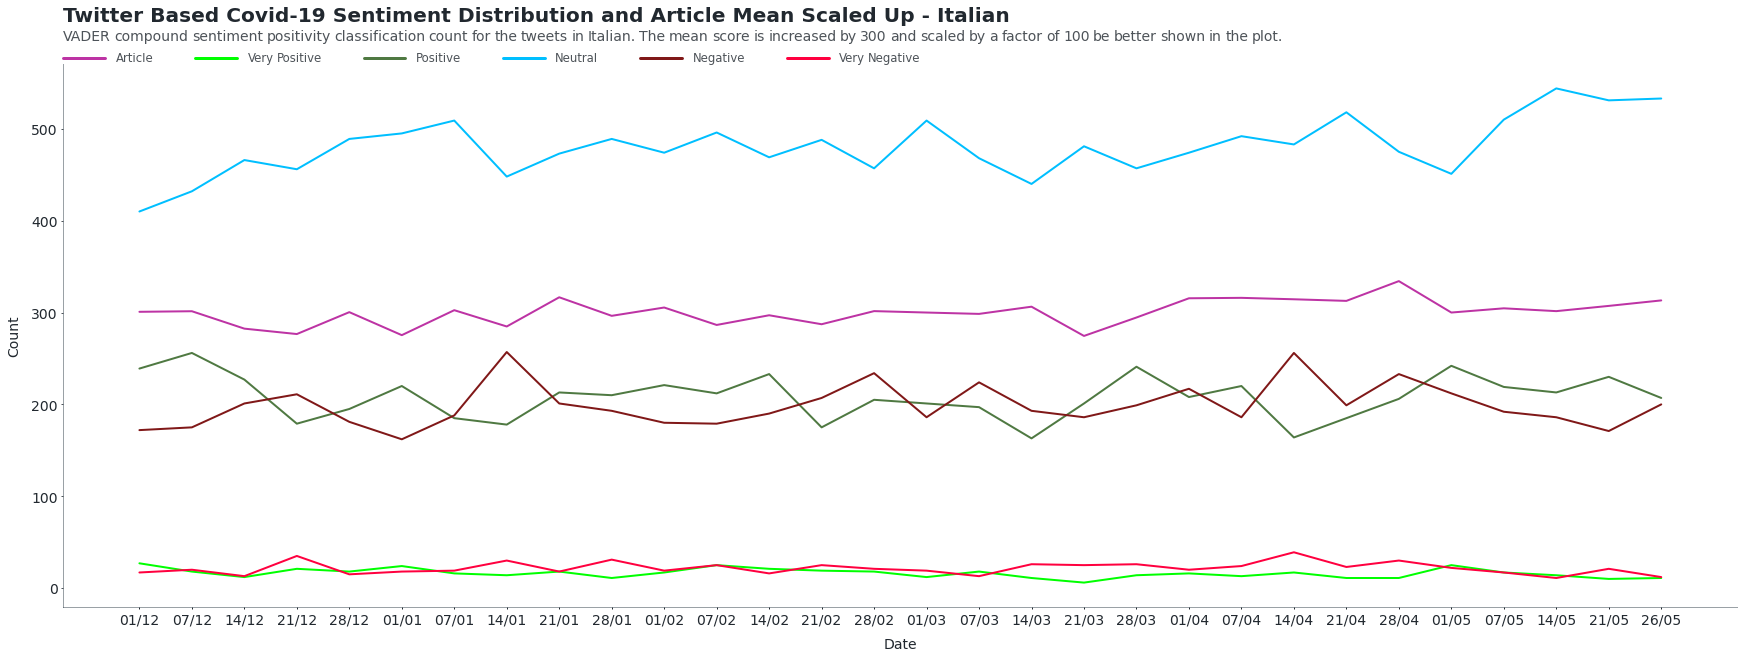

In [34]:

title = 'Twitter Based Covid-19 Sentiment Distribution and Article Mean Scaled Up - Italian'
caption =   """
            VADER compound sentiment positivity classification count for the tweets in Italian.
            The mean score is increased by 300 and scaled by a factor of 100 be better shown in the plot.
            """
figname = 'Italian Distribution'

plotDistributionLinesWithMean(counts[6], title, caption, article_mean['Italy'], figname)

# Match Article Headlines and Tweets to Dates

I found that the most visually informative plots where the daily sentiment classification count plots, so for this final
visualization step I will use these plots and annotate article headings and tweet texts to dips and peaks in the various
lines of each language plot. A maximum of 3 each are displayed to avoid clutter.

It is important to note that at this stage article headings where cherry picked to align with twitter SA.

Creating a function for the below was possible, but I ended up preferring copy pasting the code as a template since
annotations must be annotated in the middle of the process.

# UK

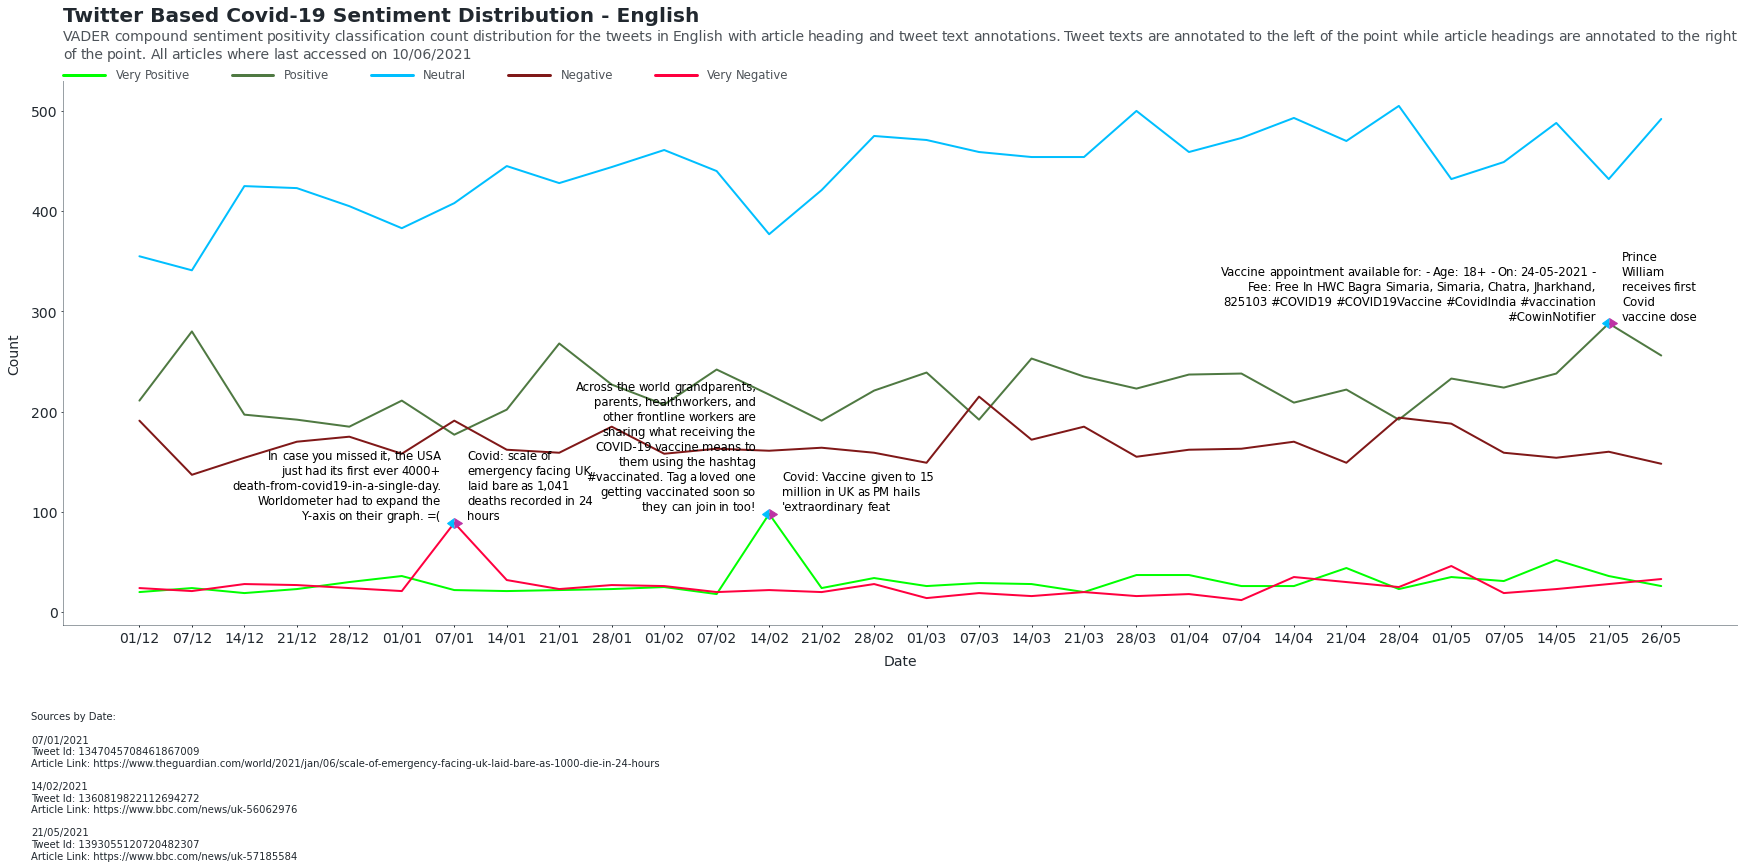

In [38]:
title = 'Twitter Based Covid-19 Sentiment Distribution - English'
caption =   """
            VADER compound sentiment positivity classification count distribution for the tweets in English
            with article heading and tweet text annotations. Tweet texts are annotated to the left of the point while article headings are annotated to the right of the point.
            All articles where last accessed on 10/06/2021
            """

figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), counts[1]['very_positive'], **style, **vp_style, with_legend=True)
viz.draw_time_series(range(0, 30), counts[1]['positive'], **style, **p_style, with_legend=True)
viz.draw_time_series(range(0, 30), counts[1]['neutral'], **style, **nn_style, with_legend=True)
viz.draw_time_series(range(0, 30), counts[1]['negative'], **style, **n_style, with_legend=True)
viz.draw_time_series(range(0, 30), counts[1]['very_negative'], **style, **vn_style, with_legend=True)

t_annotation_style = { 'fontsize': 'small', 'va': 'bottom', 'align': 'right', 'pad': 0.25 }
a_annotation_style = { 'fontsize': 'small', 'va': 'bottom', 'align': 'left', 'pad': 0.25 }
t_marker_style = { 'marker': 8, 'markersize': 10, 'color': '#00bfff' }
a_marker_style = { 'marker': 9, 'markersize': 10, 'color': '#bd33a4' }

# create specific styles so that the annotation and the time series have the same color
tweet_annotation_style = { 'color': '#000000' }
article_annotation_style = { 'color': '#000000' }

# 07/01
tweet_text = "In case you missed it, the USA just had its first ever 4000+ death-from-covid19-in-a-single-day. Worldometer had to expand the Y-axis on their graph. =("
tweet_id = "1347045708461867009"

article_headline = "Covid: scale of emergency facing UK laid bare as 1,041 deaths recorded in 24 hours"
article_source = "https://www.theguardian.com/world/2021/jan/06/scale-of-emergency-facing-uk-laid-bare-as-1000-die-in-24-hours"

sources = 'Sources by Date:\n\n07/01/2021\nTweet Id: ' + tweet_id + '\nArticle Link: ' + article_source + '\n\n'

viz.annotate(tweet_text, (2, 6), counts[1]['very_negative'][6],
             marker=t_marker_style, **t_annotation_style, **tweet_annotation_style)
viz.annotate(article_headline, (6, 9), counts[1]['very_negative'][6],
             marker=a_marker_style, **a_annotation_style, **article_annotation_style)

# 14/02
tweet_text = """Across the world grandparents, parents, healthworkers, and other frontline workers are sharing what receiving the COVID-19 vaccine means to them using the hashtag #vaccinated.
                Tag a loved one getting vaccinated soon so they can join in too!"""
tweet_id = "1360819822112694272"

article_headline = "Covid: Vaccine given to 15 million in UK as PM hails 'extraordinary feat"
article_source = "https://www.bbc.com/news/uk-56062976"

sources += '14/02/2021\nTweet Id: ' + tweet_id + '\nArticle Link: ' + article_source + '\n\n'

viz.annotate(tweet_text, (8, 12), counts[1]['very_positive'][12],
             marker=t_marker_style, **t_annotation_style, **tweet_annotation_style)
viz.annotate(article_headline, (12, 16), counts[1]['very_positive'][12],
             marker=a_marker_style, **a_annotation_style, **article_annotation_style)

# 21/05
tweet_text = """Vaccine appointment available for:\n
 - Age: 18+\n
 - On: 24-05-2021\n
 - Fee: Free\n

In HWC Bagra Simaria, Simaria, Chatra, Jharkhand, 825103
#COVID19 #COVID19Vaccine #CovidIndia #vaccination #CowinNotifier"""
tweet_id = "1393055120720482307"

article_headline = "Prince William receives first Covid vaccine dose"
article_source = "https://www.bbc.com/news/uk-57185584"

sources += '21/05/2021\nTweet Id: ' + tweet_id + '\nArticle Link: ' + article_source

viz.annotate(tweet_text, (20, 28), counts[1]['positive'][28],
             marker=t_marker_style, **t_annotation_style, **tweet_annotation_style)
viz.annotate(article_headline, (28, 30), counts[1]['positive'][28],
             marker=a_marker_style, **a_annotation_style, **article_annotation_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Count')
viz.set_title(title, loc='left')
viz.set_caption(caption, align='justify')

plt.figtext(0.11, -0.2, sources, fontsize = 10)
viz.savefig(fname='Output/Final English Annotated Distribution', dpi=300, bbox_inches='tight')

# Spain

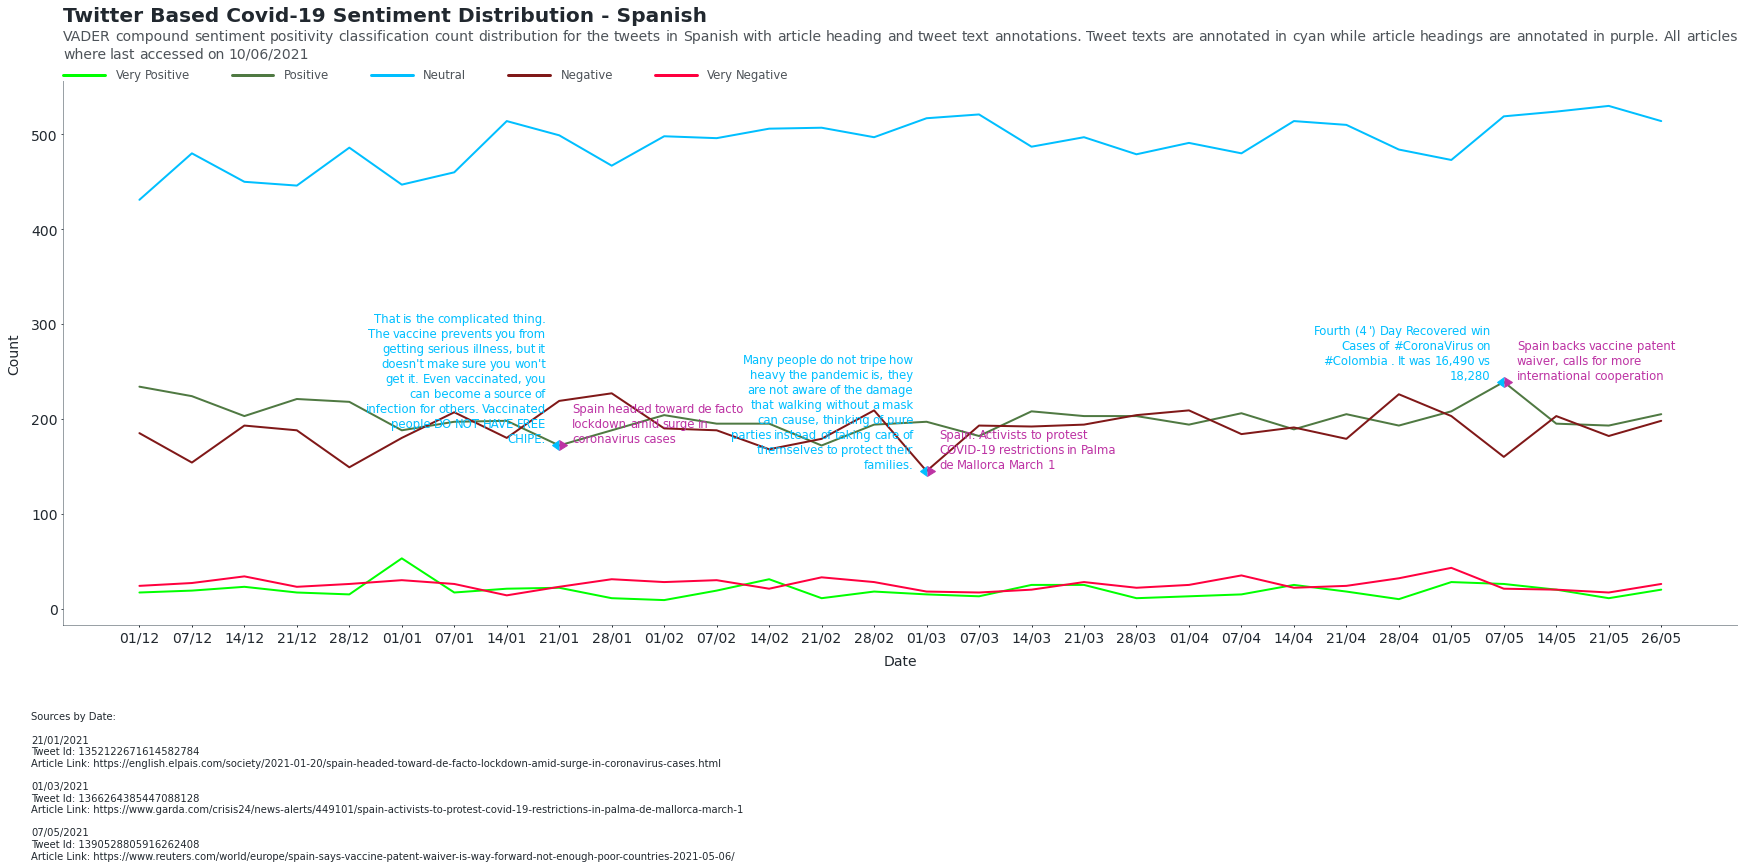

In [36]:
title = 'Twitter Based Covid-19 Sentiment Distribution - Spanish'
caption =   """
            VADER compound sentiment positivity classification count distribution for the tweets in Spanish
            with article heading and tweet text annotations. Tweet texts are annotated in cyan while article headings are annotated in purple.
            All articles where last accessed on 10/06/2021
            """

figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), counts[2]['very_positive'], **style, **vp_style, with_legend=True)
viz.draw_time_series(range(0, 30), counts[2]['positive'], **style, **p_style, with_legend=True)
viz.draw_time_series(range(0, 30), counts[2]['neutral'], **style, **nn_style, with_legend=True)
viz.draw_time_series(range(0, 30), counts[2]['negative'], **style, **n_style, with_legend=True)
viz.draw_time_series(range(0, 30), counts[2]['very_negative'], **style, **vn_style, with_legend=True)

# 21/01
tweet_text = """



That is the complicated thing.
The vaccine prevents you from getting serious illness, but it doesn't make sure you won't get it.
Even vaccinated, you can become a source of infection for others.

Vaccinated people DO NOT HAVE FREE CHIPE."""
tweet_id = "1352122671614582784"

article_headline = "Spain headed toward de facto lockdown amid surge in coronavirus cases"
article_source = "https://english.elpais.com/society/2021-01-20/spain-headed-toward-de-facto-lockdown-amid-surge-in-coronavirus-cases.html"

sources = 'Sources by Date:\n\n21/01/2021\nTweet Id: ' + tweet_id + '\nArticle Link: ' + article_source + '\n\n'

viz.annotate(tweet_text, (4, 8), counts[2]['positive'][8],
             marker=t_marker_style, **t_annotation_style, **tweet_annotation_style)
viz.annotate(article_headline, (8, 12), counts[2]['positive'][8],
             marker=a_marker_style, **a_annotation_style, **article_annotation_style)

# 01/03
tweet_text = """Many people do not tripe how heavy the pandemic is, they are not aware of the damage that walking without a mask can cause, thinking of pure parties instead of taking care of themselves to protect their families."""
tweet_id = "1366264385447088128"

article_headline = "Spain: Activists to protest COVID-19 restrictions in Palma de Mallorca March 1"
article_source = "https://www.garda.com/crisis24/news-alerts/449101/spain-activists-to-protest-covid-19-restrictions-in-palma-de-mallorca-march-1"

sources += '01/03/2021\nTweet Id: ' + tweet_id + '\nArticle Link: ' + article_source + '\n\n'

viz.annotate(tweet_text, (11, 15), counts[2]['negative'][15],
             marker=t_marker_style, **t_annotation_style, **tweet_annotation_style)
viz.annotate(article_headline, (15, 19), counts[2]['negative'][15],
             marker=a_marker_style, **a_annotation_style, **article_annotation_style)

# 07/05
tweet_text = """Fourth (4 ') Day Recovered win Cases of #CoronaVirus on #Colombia . It was 16,490 vs 18,280"""
tweet_id = "1390528805916262408"

article_headline = "Spain backs vaccine patent waiver, calls for more international cooperation"
article_source = "https://www.reuters.com/world/europe/spain-says-vaccine-patent-waiver-is-way-forward-not-enough-poor-countries-2021-05-06/"

sources += '07/05/2021\nTweet Id: ' + tweet_id + '\nArticle Link: ' + article_source

viz.annotate(tweet_text, (22, 26), counts[2]['positive'][26],
             marker=t_marker_style, **t_annotation_style, **tweet_annotation_style)
viz.annotate(article_headline, (26, 30), counts[2]['positive'][26],
             marker=a_marker_style, **a_annotation_style, **article_annotation_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Count')
viz.set_title(title, loc='left')
viz.set_caption(caption, align='justify')

plt.figtext(0.11, -0.2, sources, fontsize = 10)
viz.savefig(fname='Output/Final Spanish Annotated Distribution', dpi=300, bbox_inches='tight')


# France

E:\Anaconda\envs\IAPT\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\envs\IAPT\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129310 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\envs\IAPT\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129320 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda\envs\IAPT\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129310 missing from current font.
  font.set_text(s, 0, flags=flags)


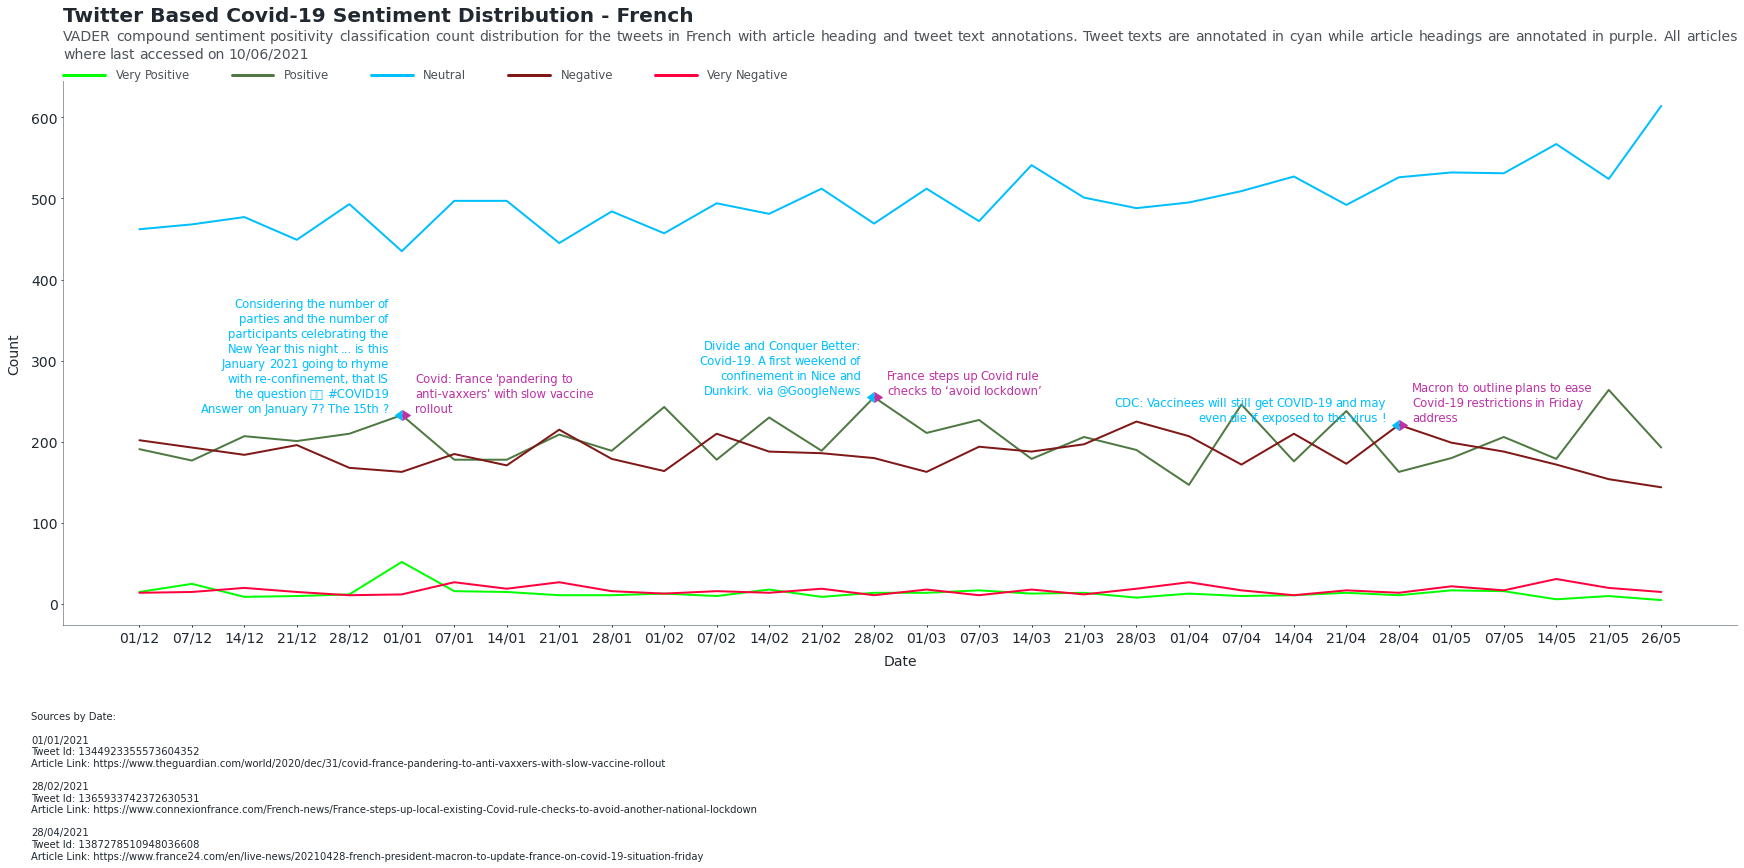

In [37]:
title = 'Twitter Based Covid-19 Sentiment Distribution - French'
caption =   """
            VADER compound sentiment positivity classification count distribution for the tweets in French
            with article heading and tweet text annotations. Tweet texts are annotated in cyan while article headings are annotated in purple.
            All articles where last accessed on 10/06/2021
            """

figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), counts[3]['very_positive'], **style, **vp_style, with_legend=True)
viz.draw_time_series(range(0, 30), counts[3]['positive'], **style, **p_style, with_legend=True)
viz.draw_time_series(range(0, 30), counts[3]['neutral'], **style, **nn_style, with_legend=True)
viz.draw_time_series(range(0, 30), counts[3]['negative'], **style, **n_style, with_legend=True)
viz.draw_time_series(range(0, 30), counts[3]['very_negative'], **style, **vn_style, with_legend=True)

# 01/01
tweet_text = """Considering the number of parties and the number of participants celebrating the New Year this night ... is this January 2021 going to rhyme with re-confinement, that IS the question 🤨🤞
#COVID19

 Answer on January 7? The 15th ?"""
tweet_id = "1344923355573604352"

article_headline = "Covid: France 'pandering to anti-vaxxers' with slow vaccine rollout"
article_source = "https://www.theguardian.com/world/2020/dec/31/covid-france-pandering-to-anti-vaxxers-with-slow-vaccine-rollout"

sources = 'Sources by Date:\n\n01/01/2021\nTweet Id: ' + tweet_id + '\nArticle Link: ' + article_source + '\n\n'

viz.annotate(tweet_text, (1, 5), counts[3]['positive'][5],
             marker=t_marker_style, **t_annotation_style, **tweet_annotation_style)
viz.annotate(article_headline, (5, 9), counts[3]['positive'][5],
             marker=a_marker_style, **a_annotation_style, **article_annotation_style)

# 28/02
tweet_text = """Divide and Conquer Better: Covid-19. A first weekend of confinement in Nice and Dunkirk.

 via @GoogleNews"""
tweet_id = "1365933742372630531"

article_headline = "France steps up Covid rule checks to ‘avoid lockdown’"
article_source = "https://www.connexionfrance.com/French-news/France-steps-up-local-existing-Covid-rule-checks-to-avoid-another-national-lockdown"

sources += '28/02/2021\nTweet Id: ' + tweet_id + '\nArticle Link: ' + article_source + '\n\n'

viz.annotate(tweet_text, (10, 14), counts[3]['positive'][14],
             marker=t_marker_style, **t_annotation_style, **tweet_annotation_style)
viz.annotate(article_headline, (14, 18), counts[3]['positive'][14],
             marker=a_marker_style, **a_annotation_style, **article_annotation_style)

# 28/04
tweet_text = """CDC: Vaccinees will still get COVID-19 and may even die if exposed to the virus !"""
tweet_id = "1387278510948036608"

article_headline = "Macron to outline plans to ease Covid-19 restrictions in Friday address"
article_source = "https://www.france24.com/en/live-news/20210428-french-president-macron-to-update-france-on-covid-19-situation-friday"

sources += '28/04/2021\nTweet Id: ' + tweet_id + '\nArticle Link: ' + article_source

viz.annotate(tweet_text, (20, 24), counts[3]['negative'][24],
             marker=t_marker_style, **t_annotation_style, **tweet_annotation_style)
viz.annotate(article_headline, (24, 28), counts[3]['negative'][24],
             marker=a_marker_style, **a_annotation_style, **article_annotation_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Count')
viz.set_title(title, loc='left')
viz.set_caption(caption, align='justify')

plt.figtext(0.11, -0.2, sources, fontsize = 10)
viz.savefig(fname='Output/Final French Annotated Distribution', dpi=300, bbox_inches='tight')

# Germany

# Netherlands

# Italy